In [2]:
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)
library(reshape2)

In [ ]:
df <- read_csv('../../data/diabetes_012_health_indicators_BRFSS2015.csv')
head(df)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


In [4]:
df_category <- df %>% select(-BMI, -MentHlth, -PhysHlth, -Diabetes_012)
df_quantitative <- df %>% select(BMI, MentHlth, PhysHlth, Diabetes_012)

### Quantitative vs Quantitative

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


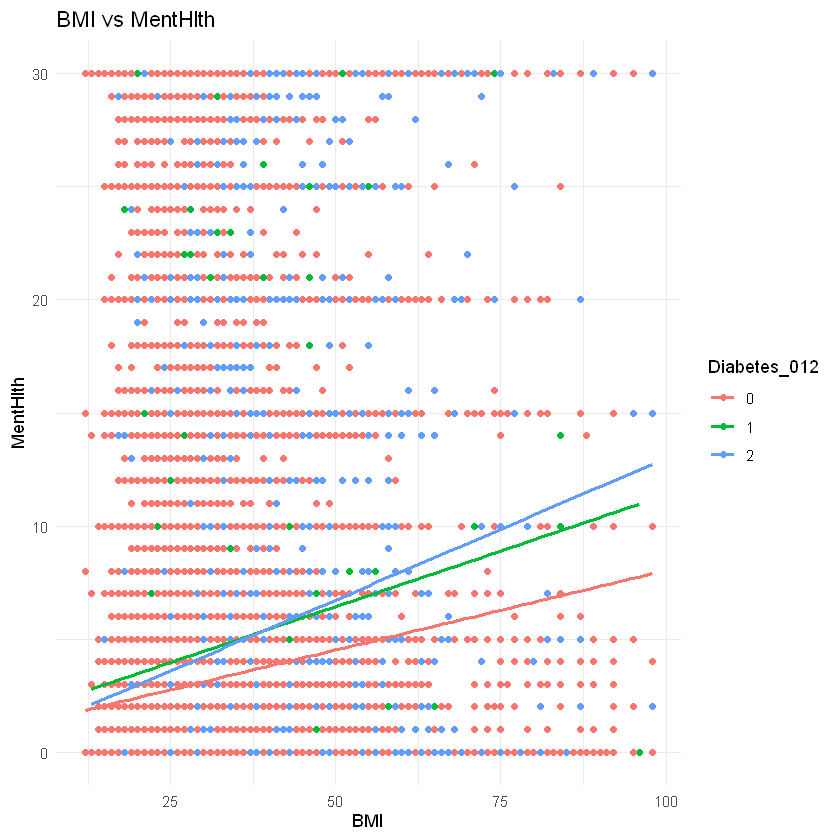

`geom_smooth()` using formula = 'y ~ x'


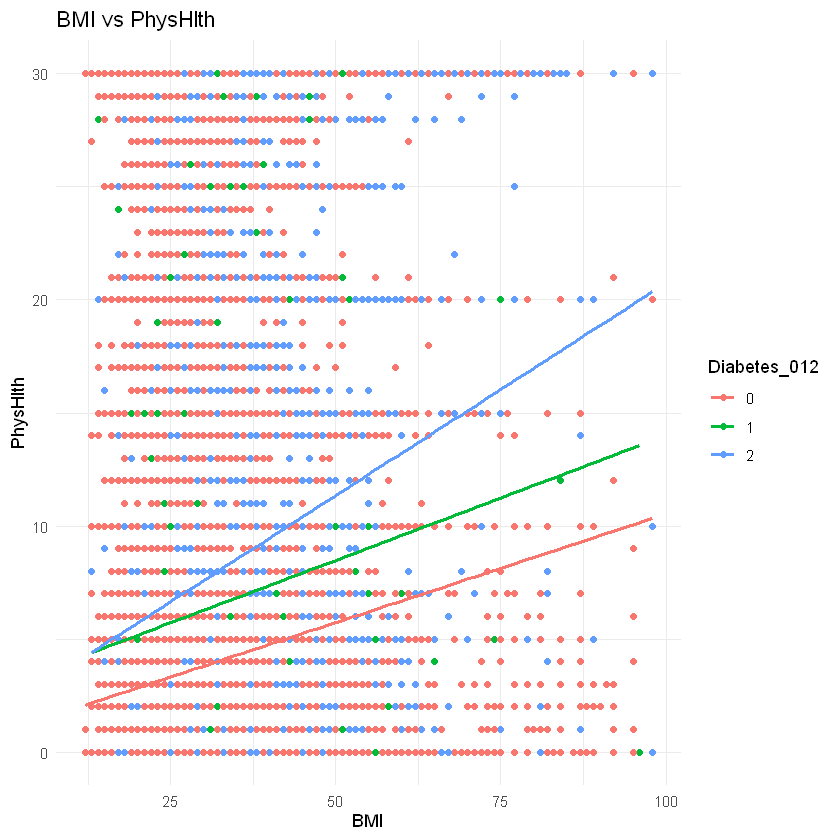

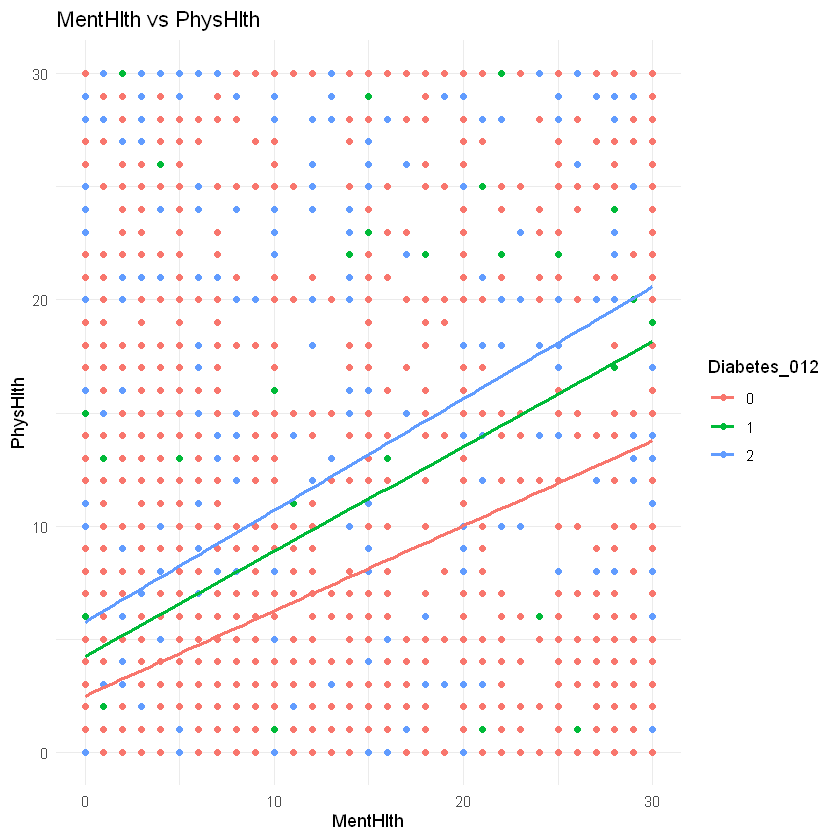

In [19]:
# vẽ scatter plot cho mỗi cặp biến định lượng (không trùng nhau)
for (i in 1:(ncol(df_quantitative)-1)) {
    for (j in (i+1):(ncol(df_quantitative)-1)) {
        if (i != j && i != ncol(df_quantitative) && j != ncol(df_quantitative)) {
            p <- ggplot(df_quantitative, 
                aes_string(x = colnames(df_quantitative)[i], y = colnames(df_quantitative)[j], color = "factor(Diabetes_012)")) + 
                geom_point() + 
                geom_smooth(method = "lm", se = FALSE) + 
                theme_minimal() + 
                labs(color = "Diabetes_012", title = paste(colnames(df_quantitative)[i], "vs", colnames(df_quantitative)[j]))
            print(p)
        }
    }
}


### Quantitative vs Category

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


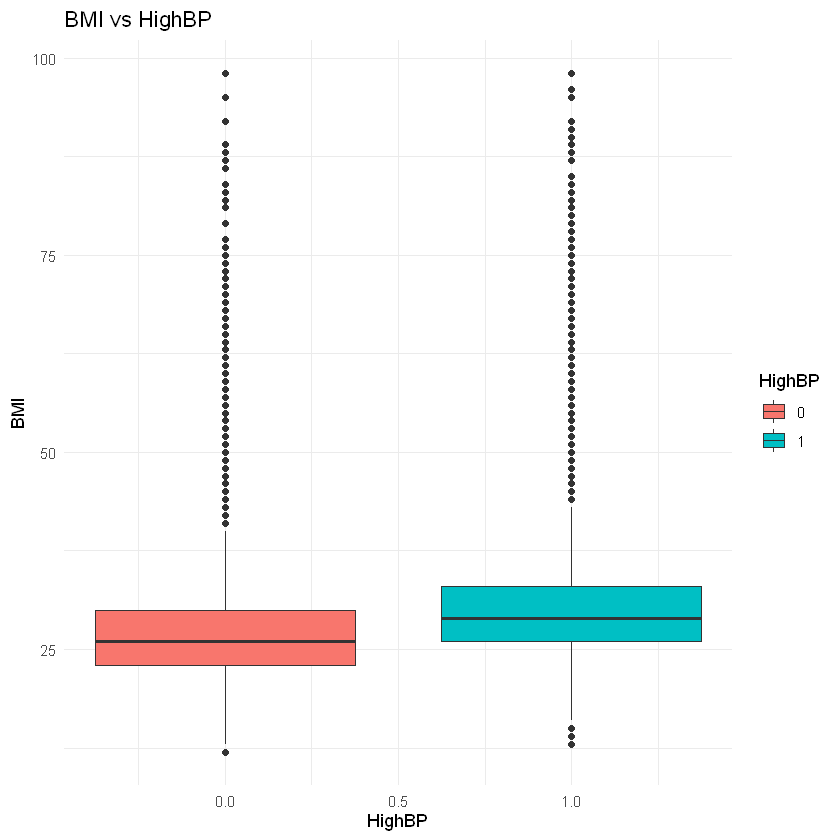

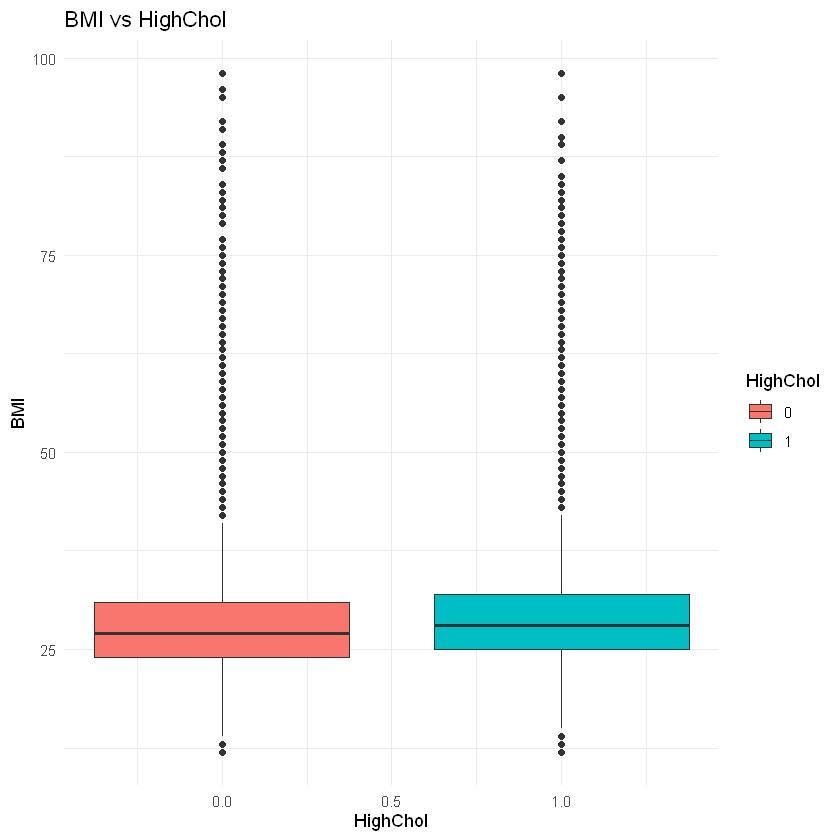

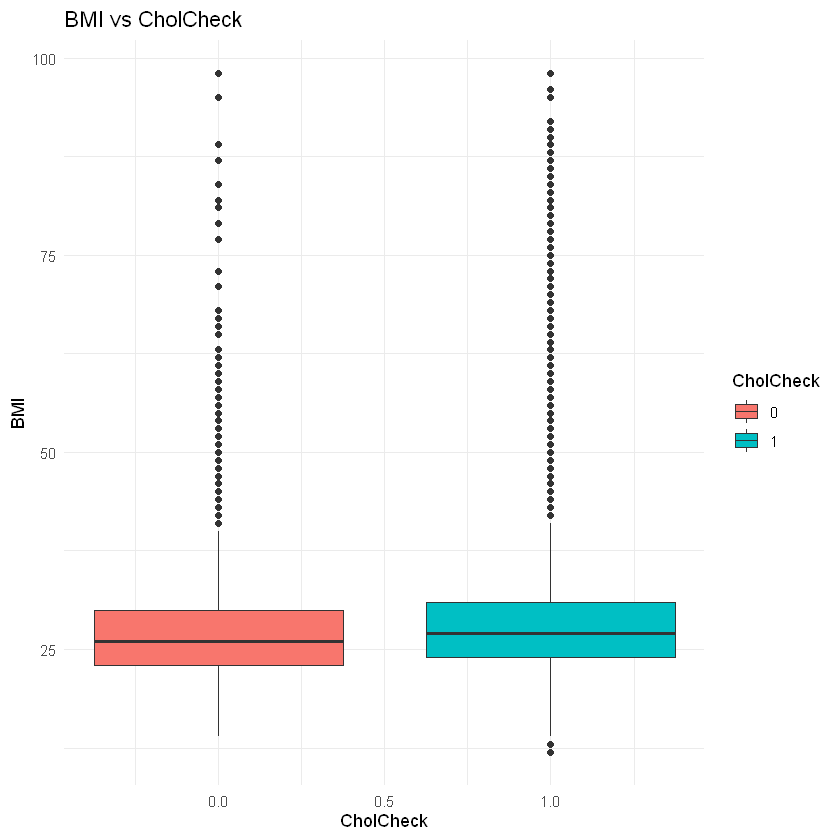

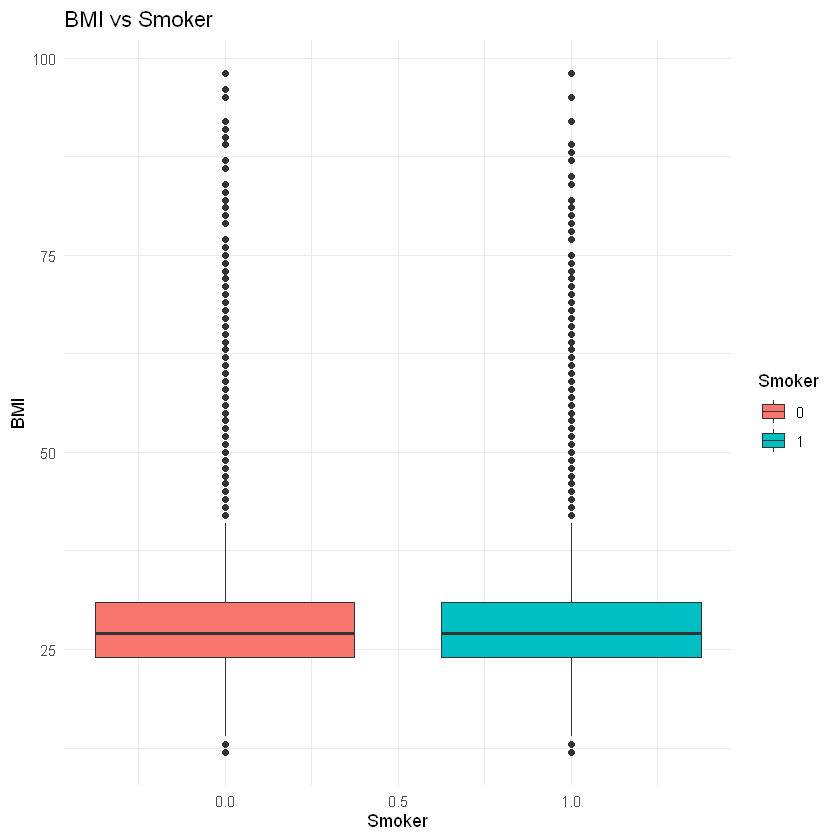

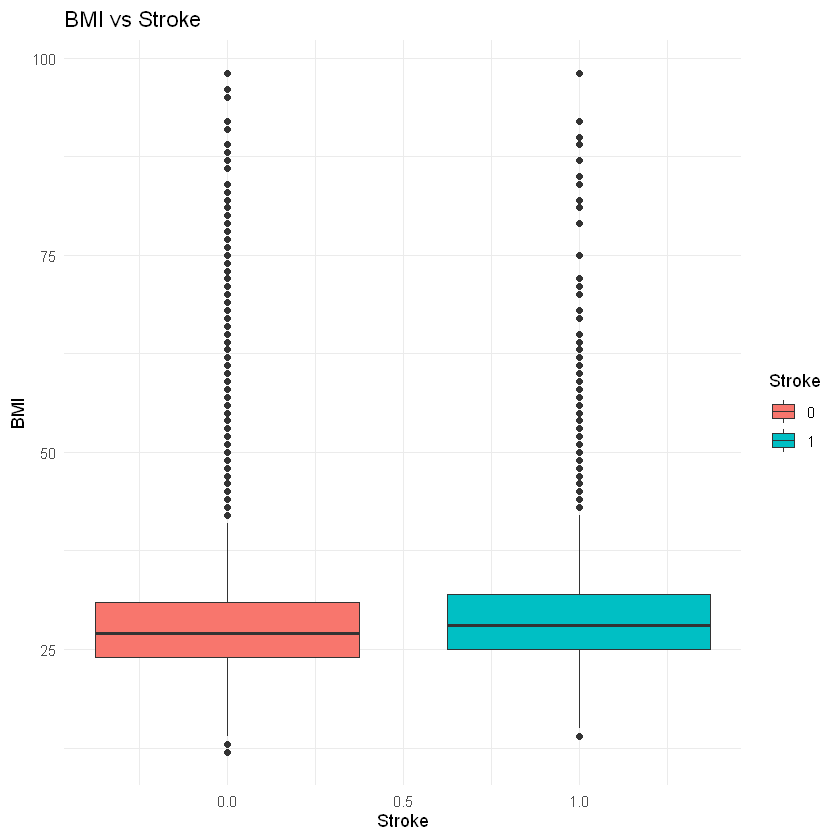

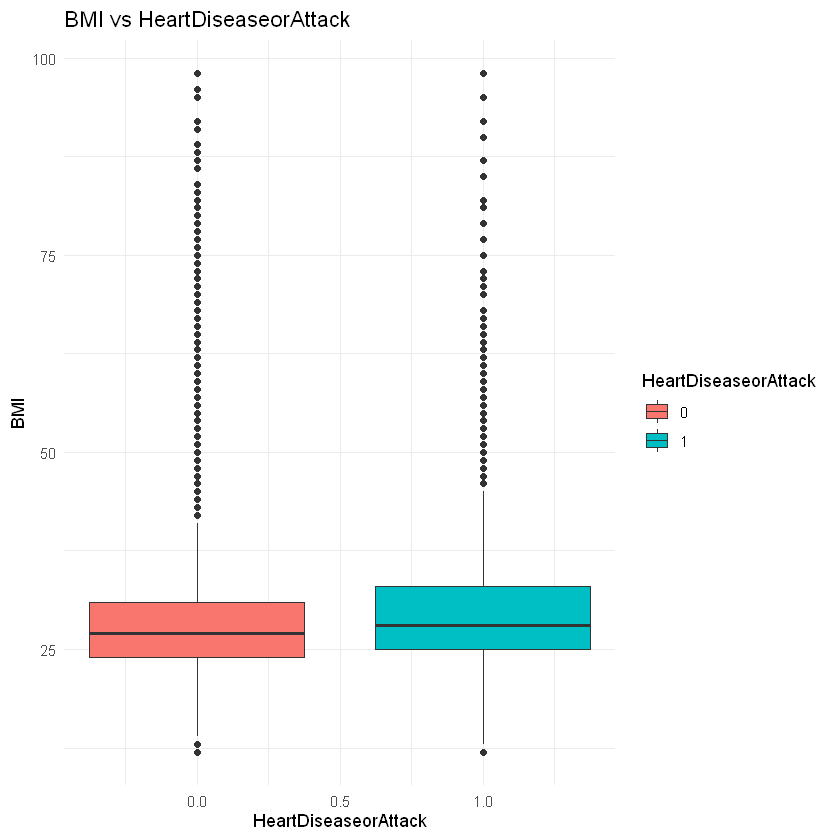

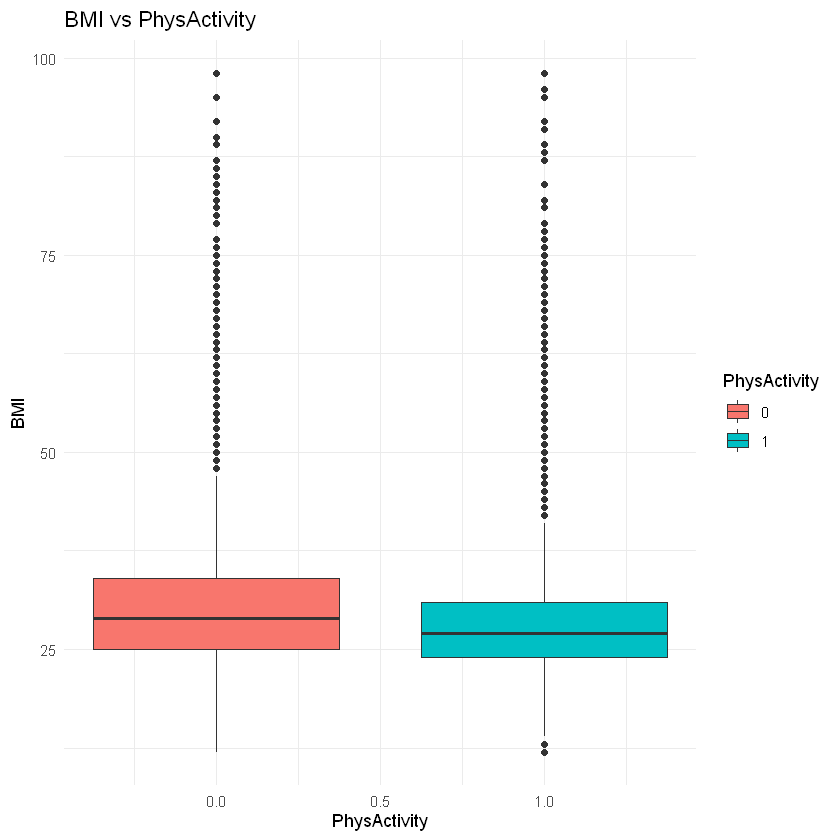

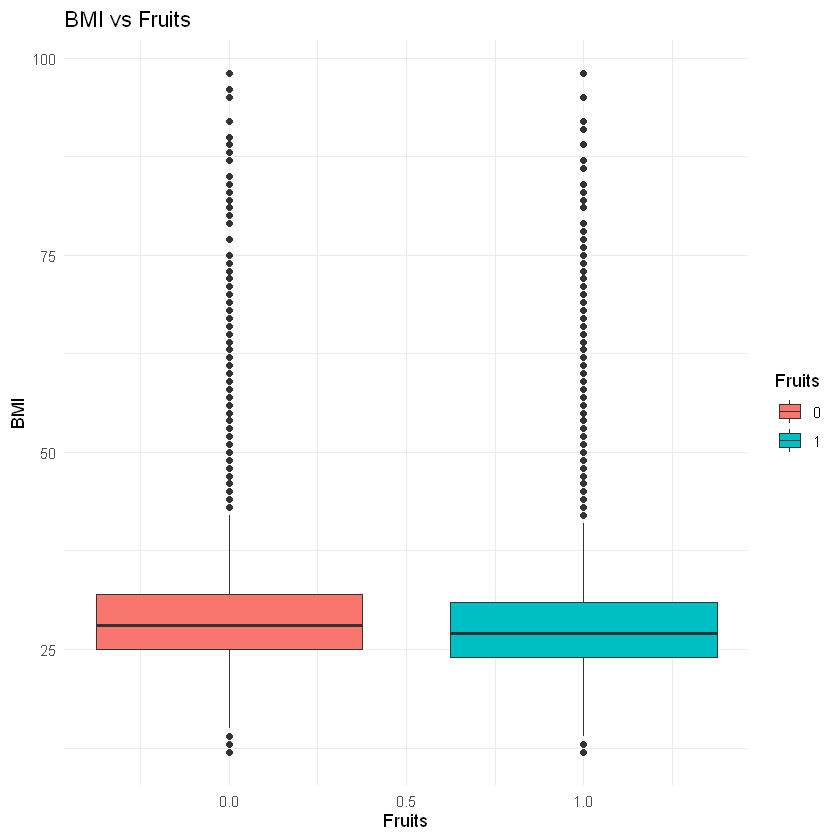

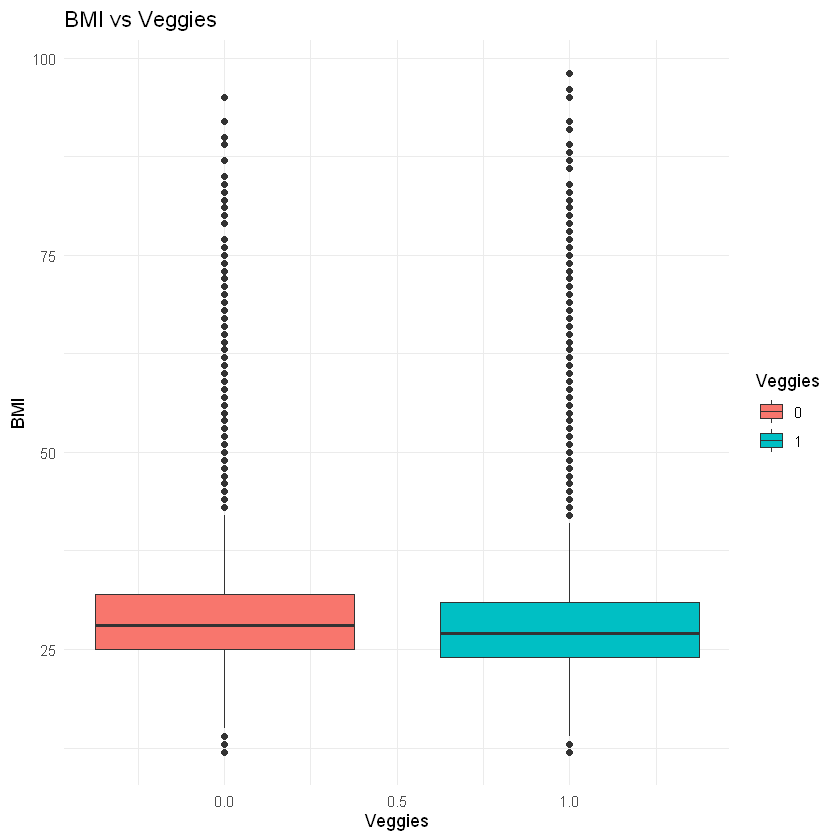

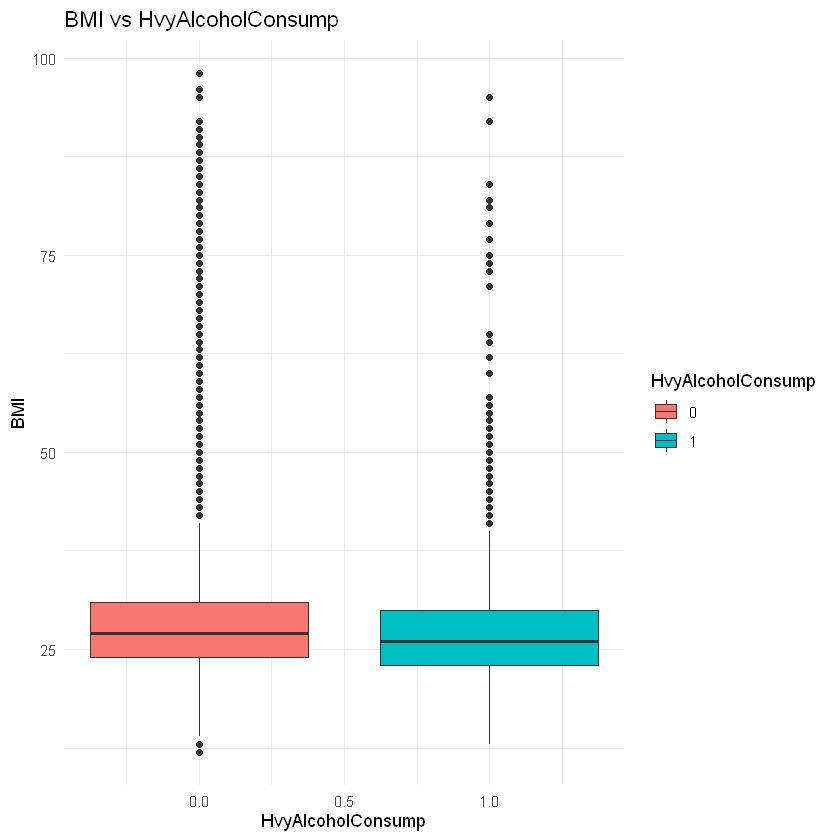

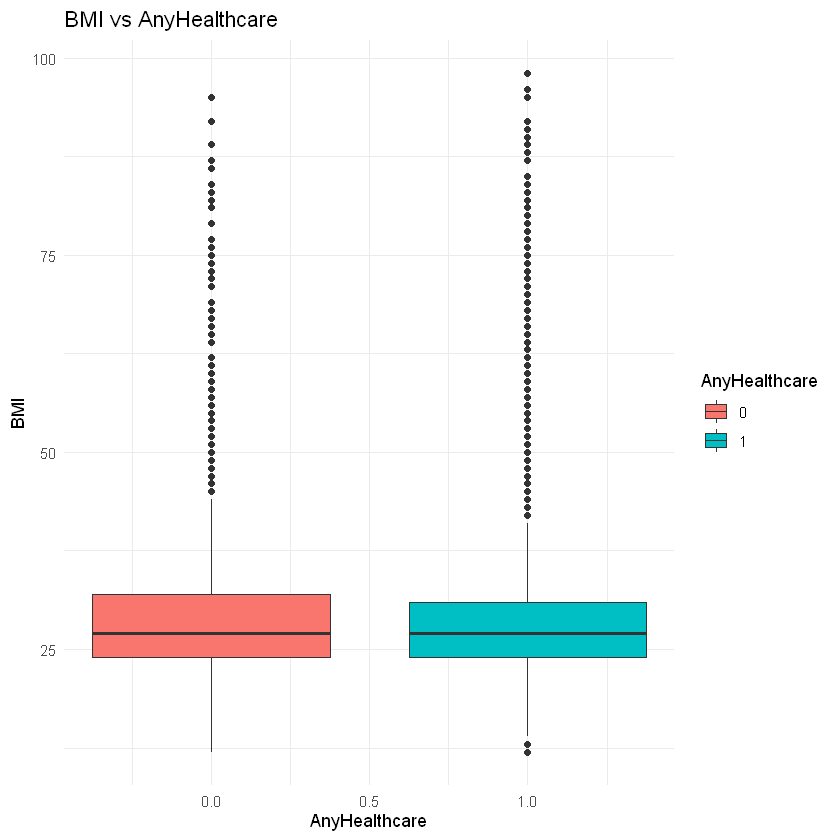

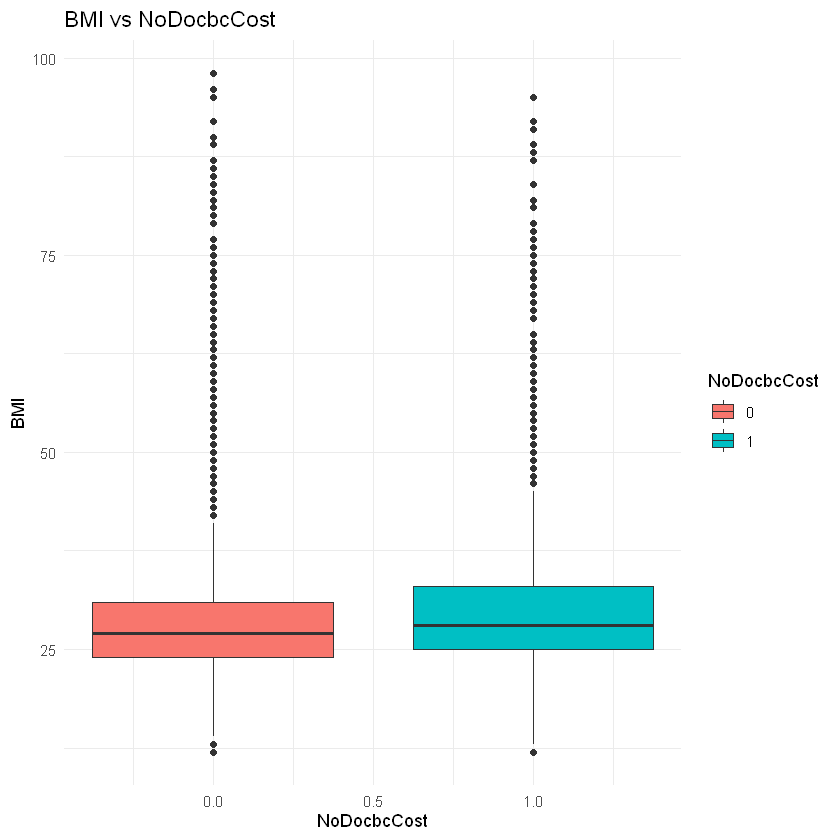

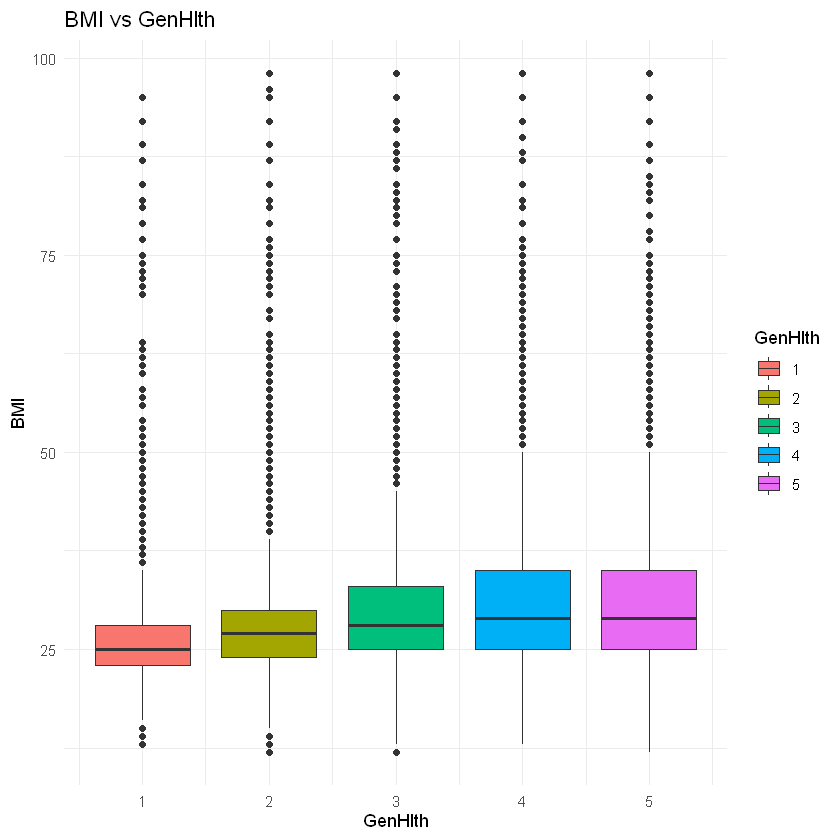

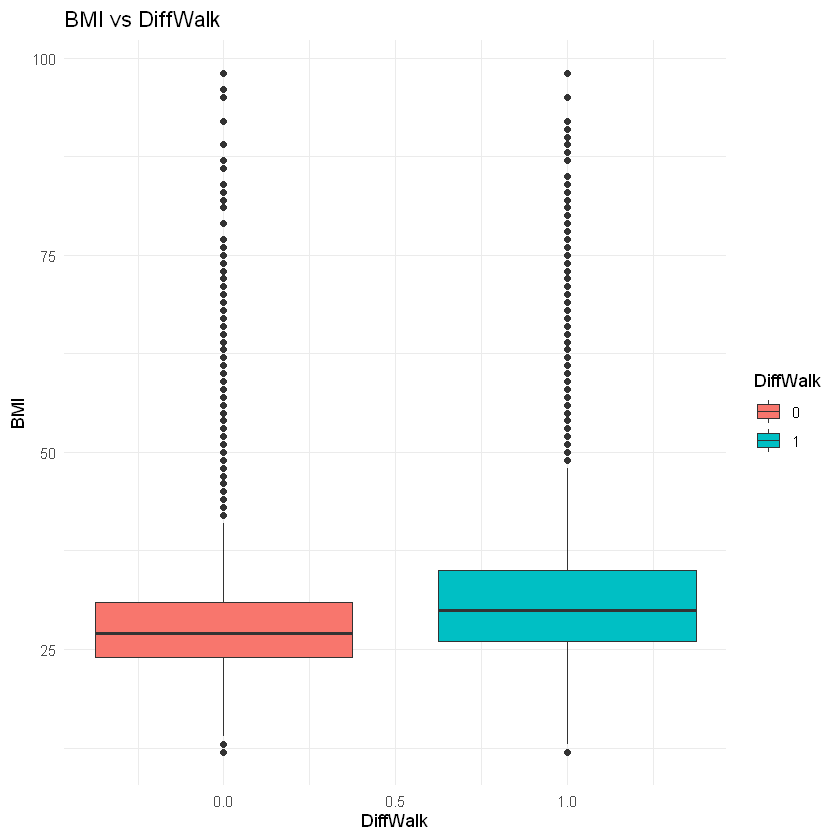

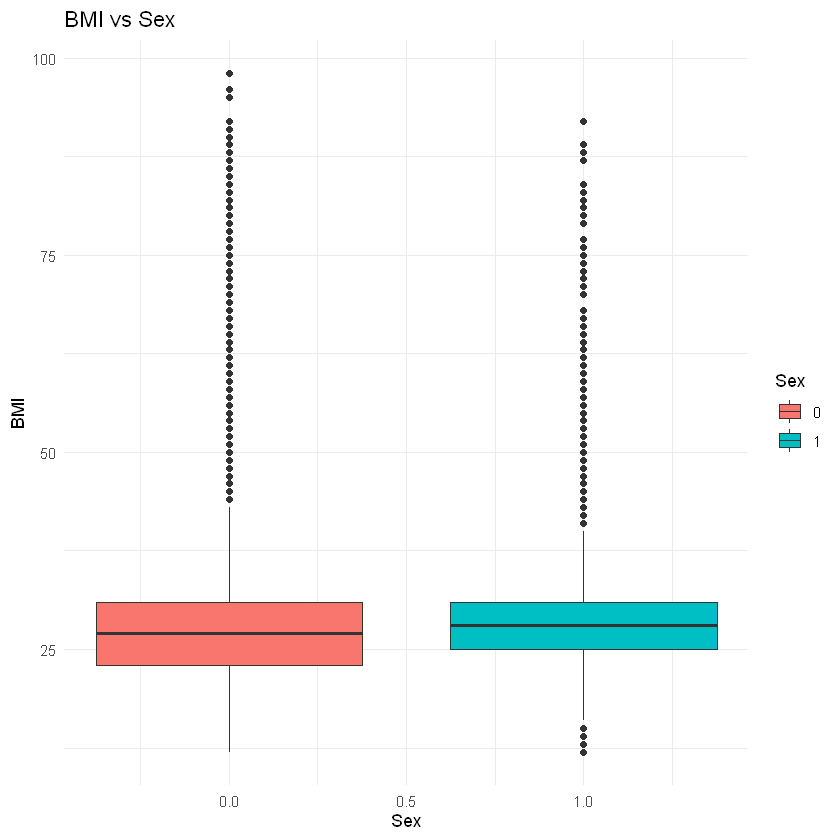

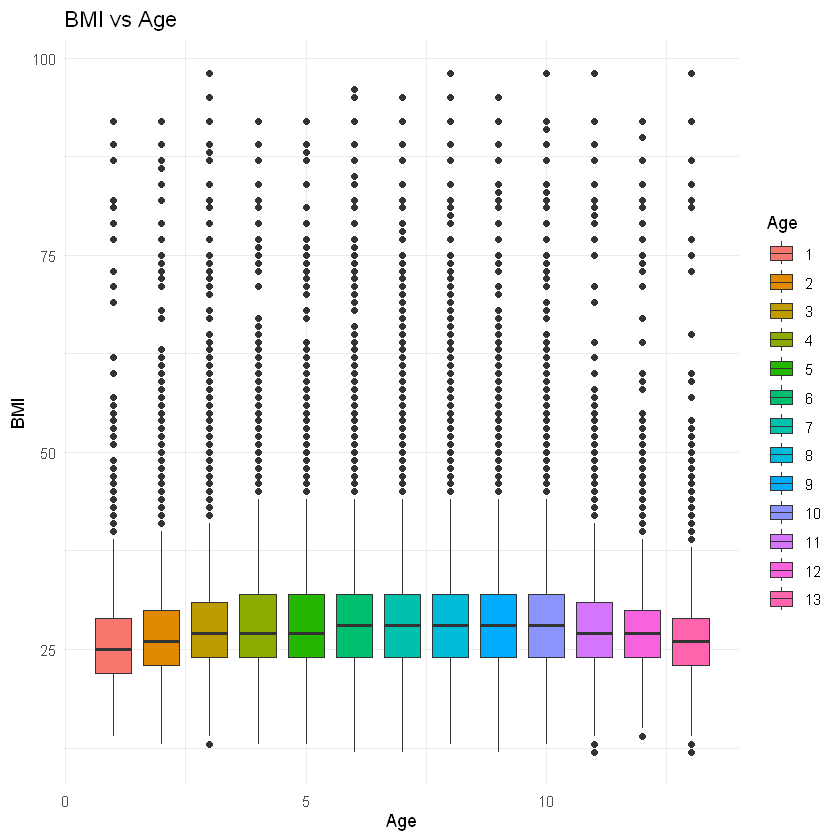

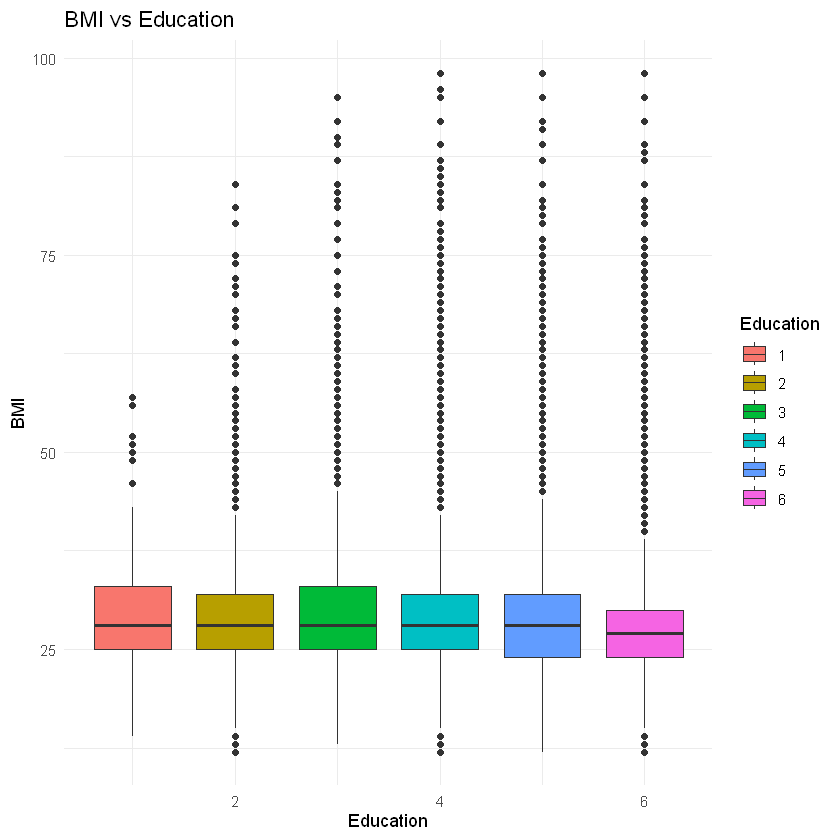

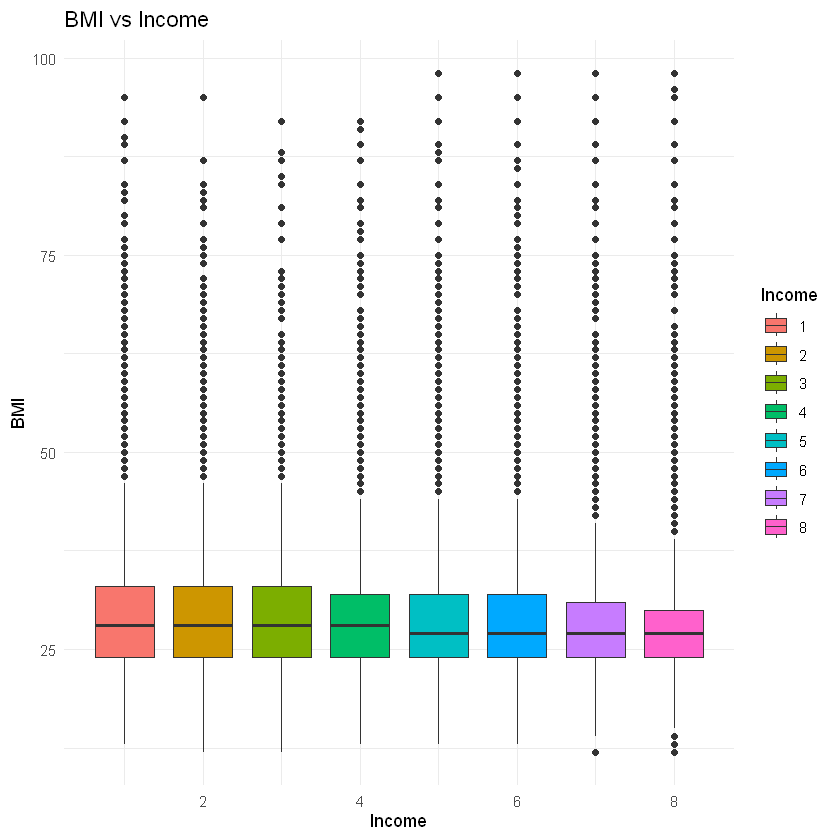

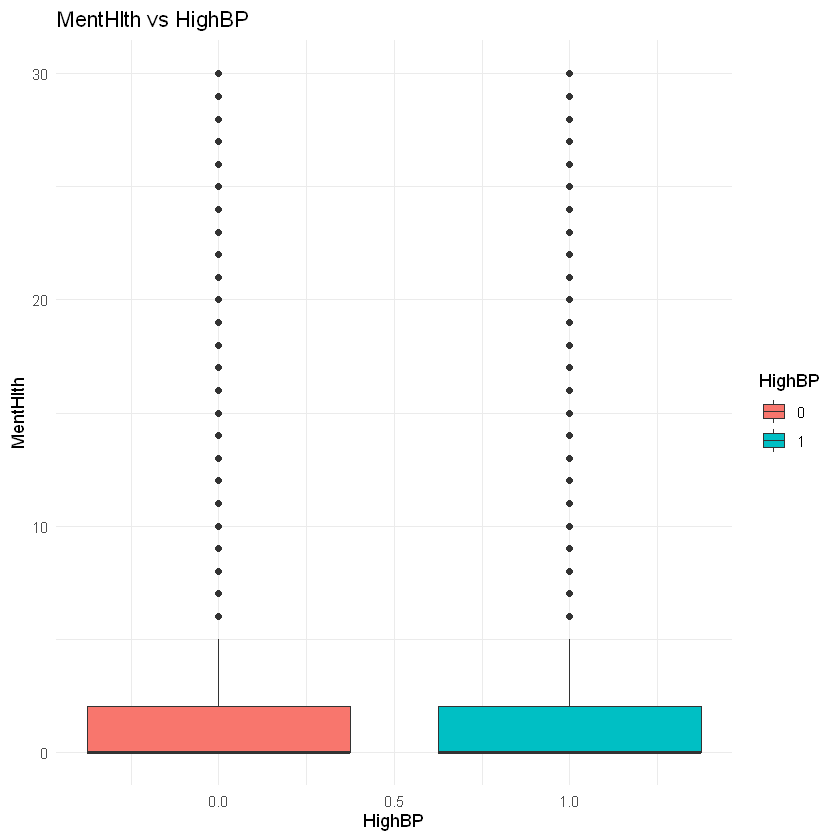

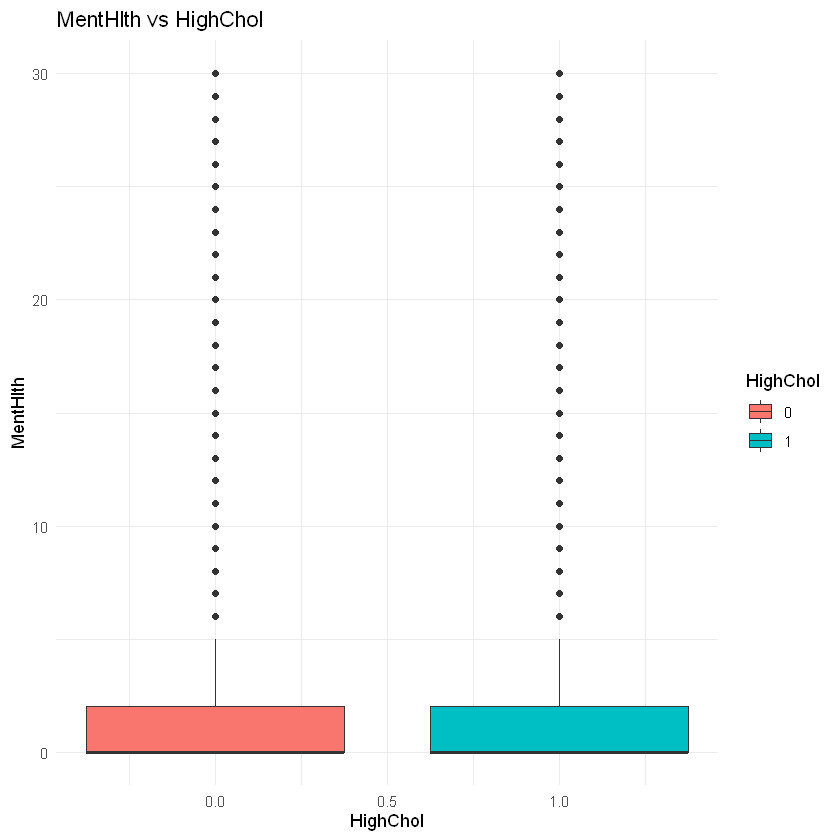

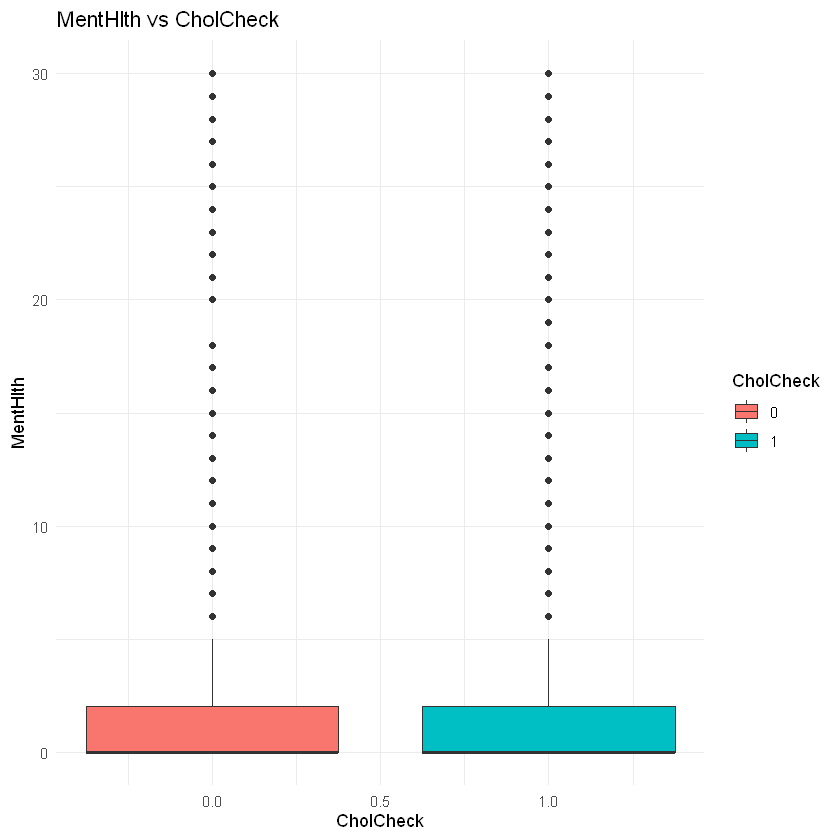

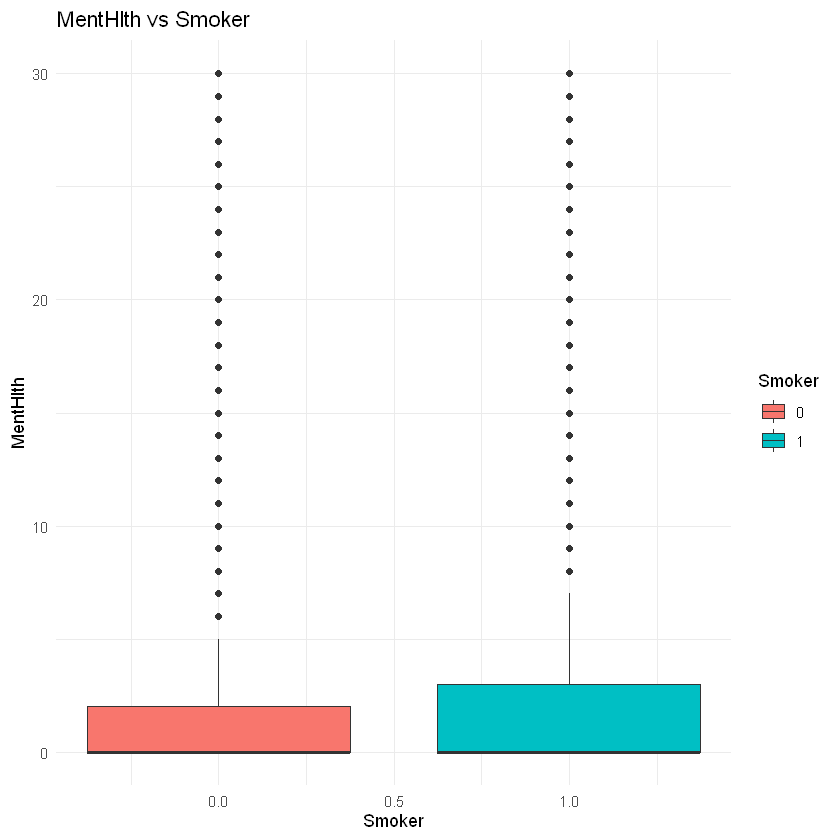

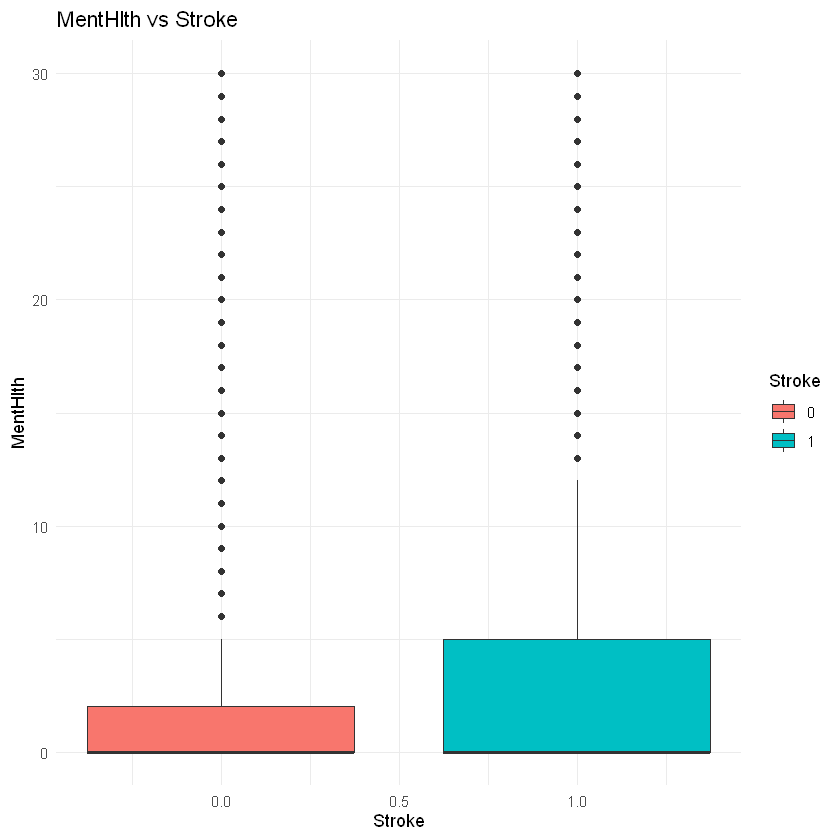

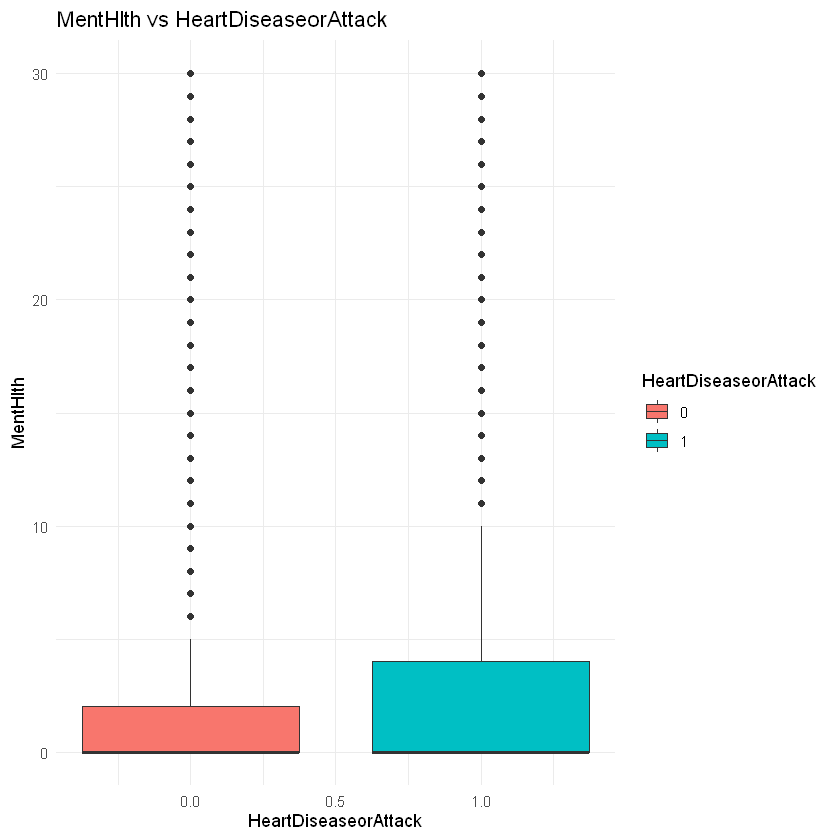

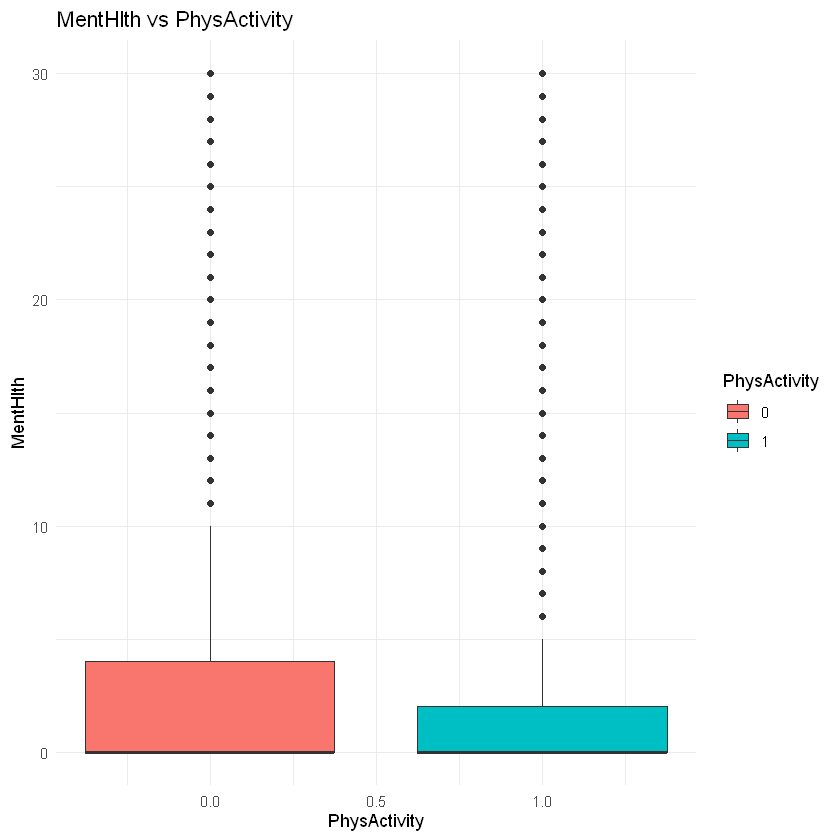

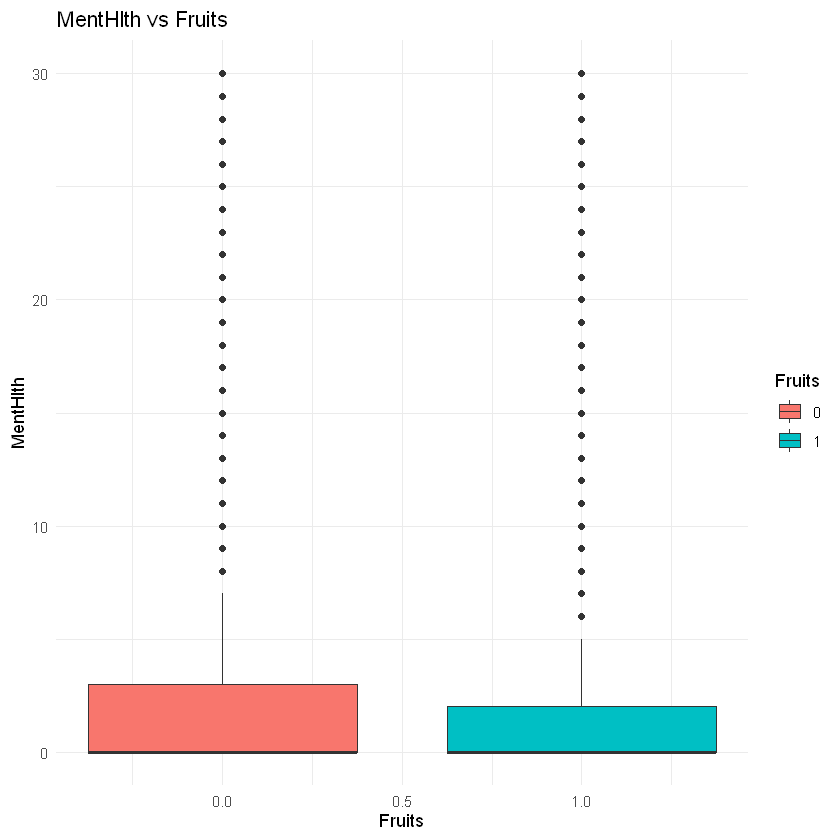

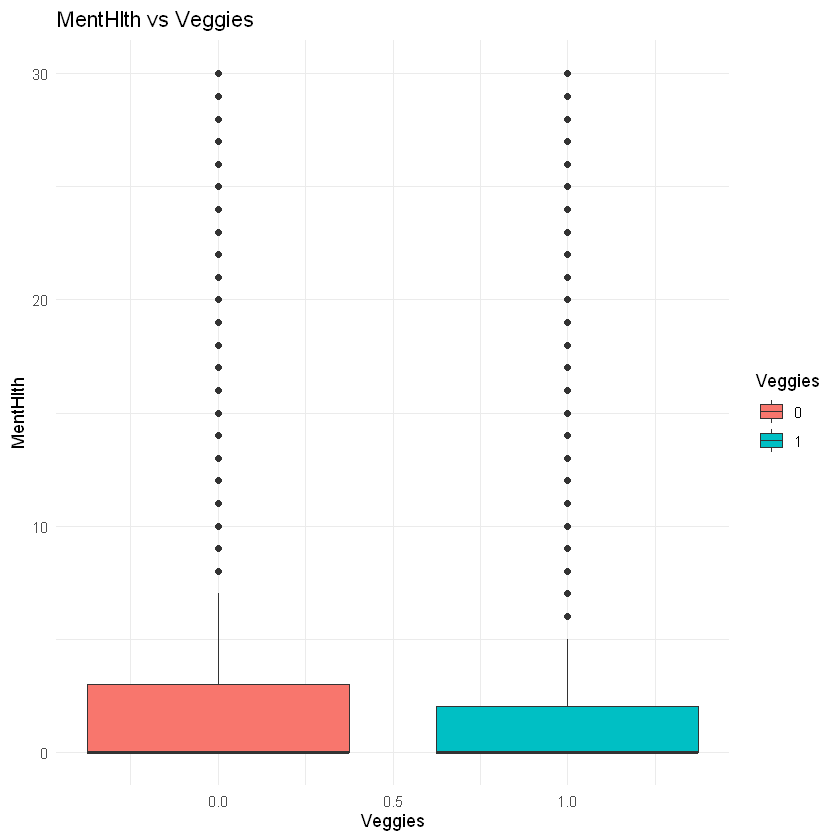

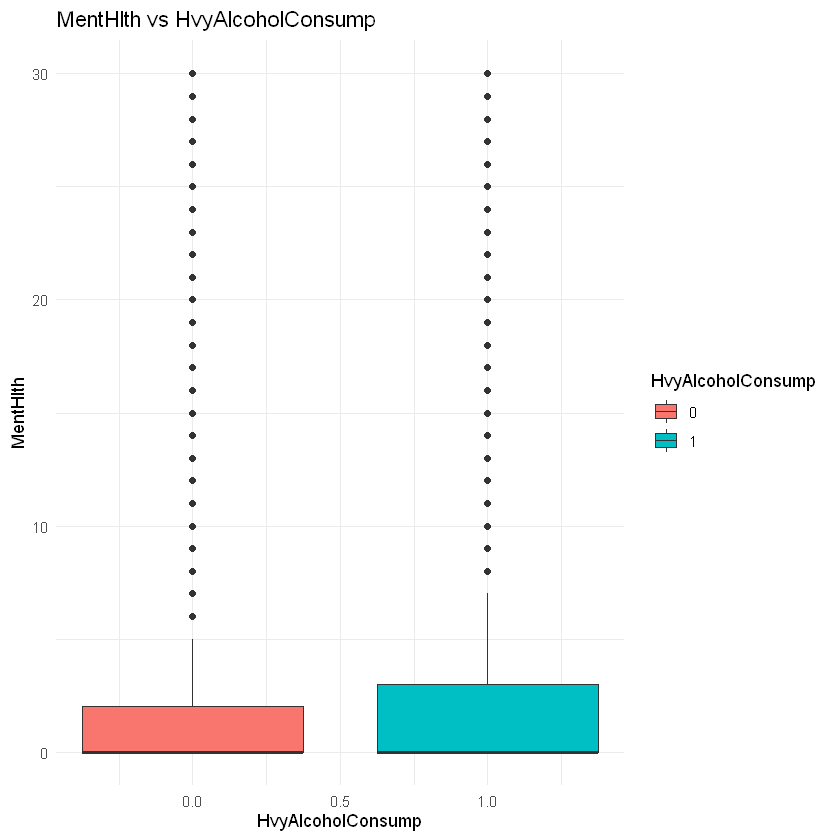

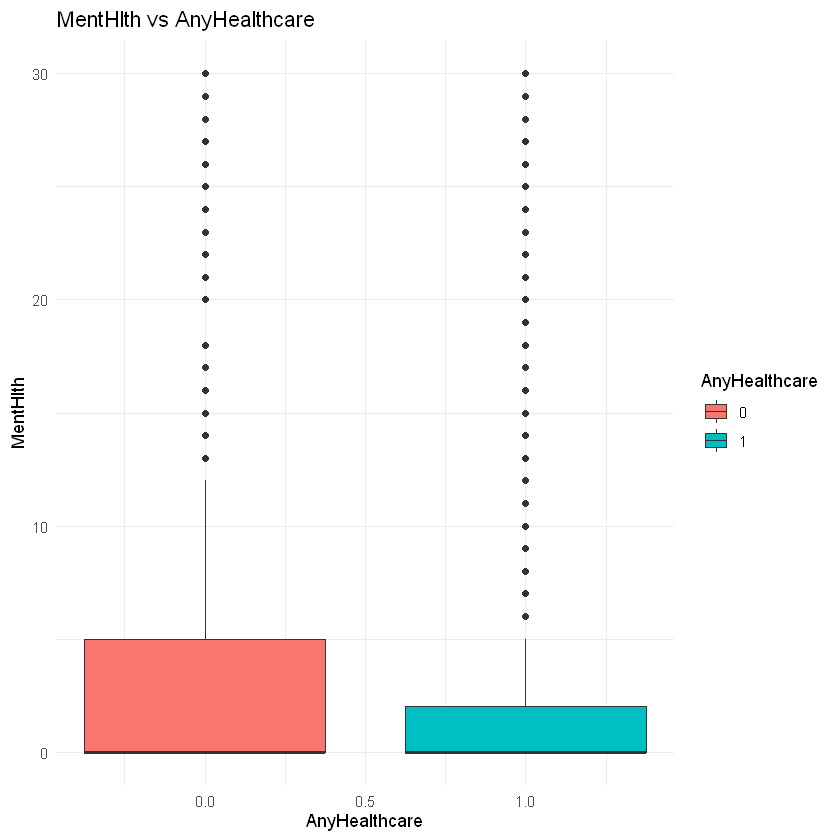

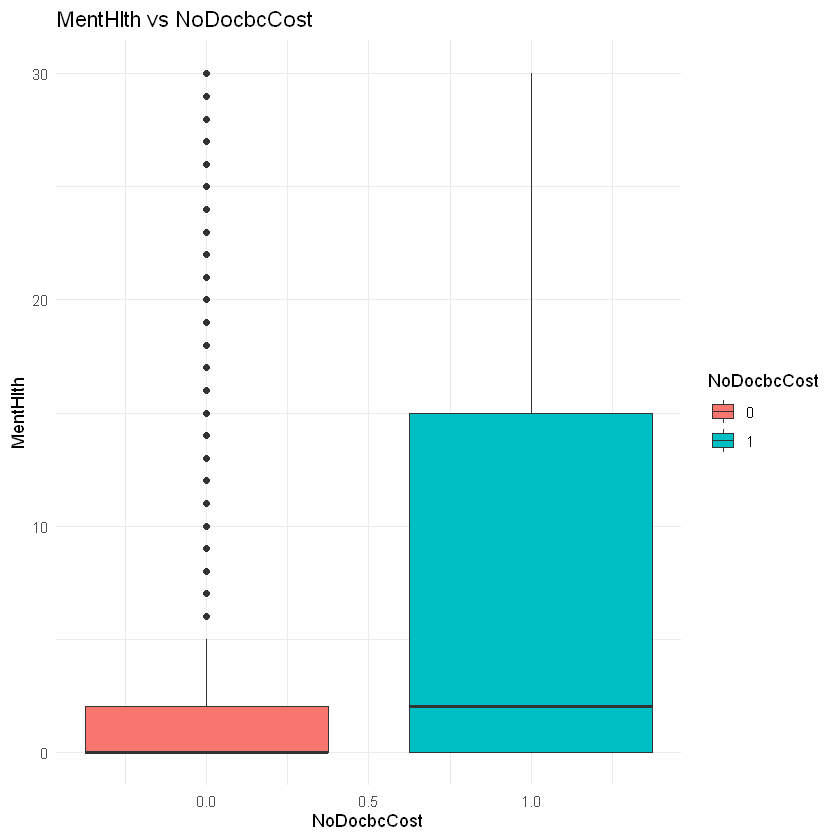

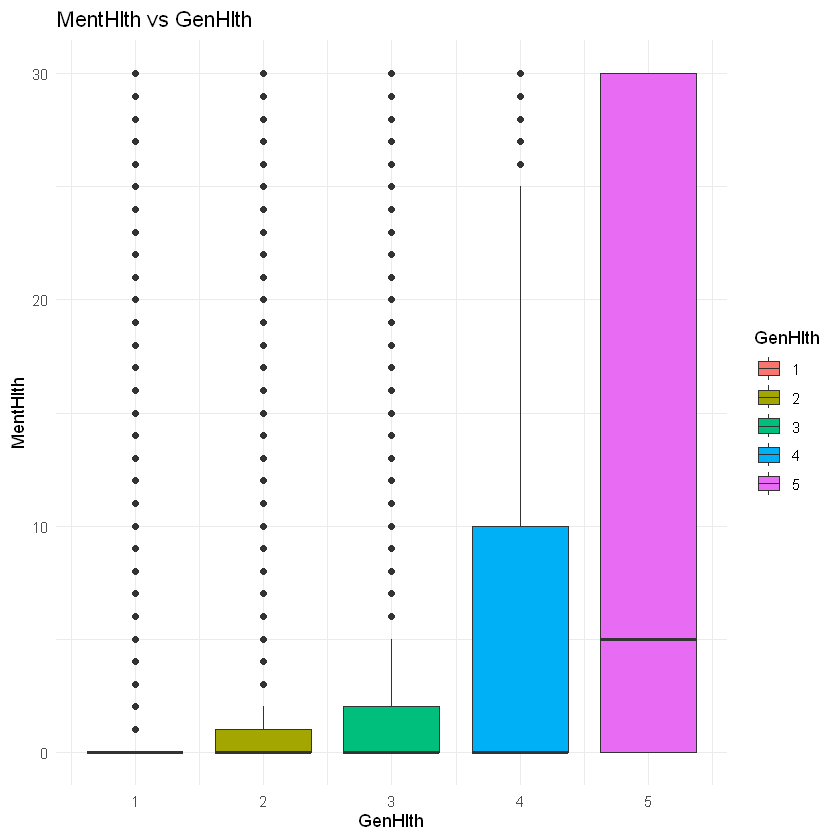

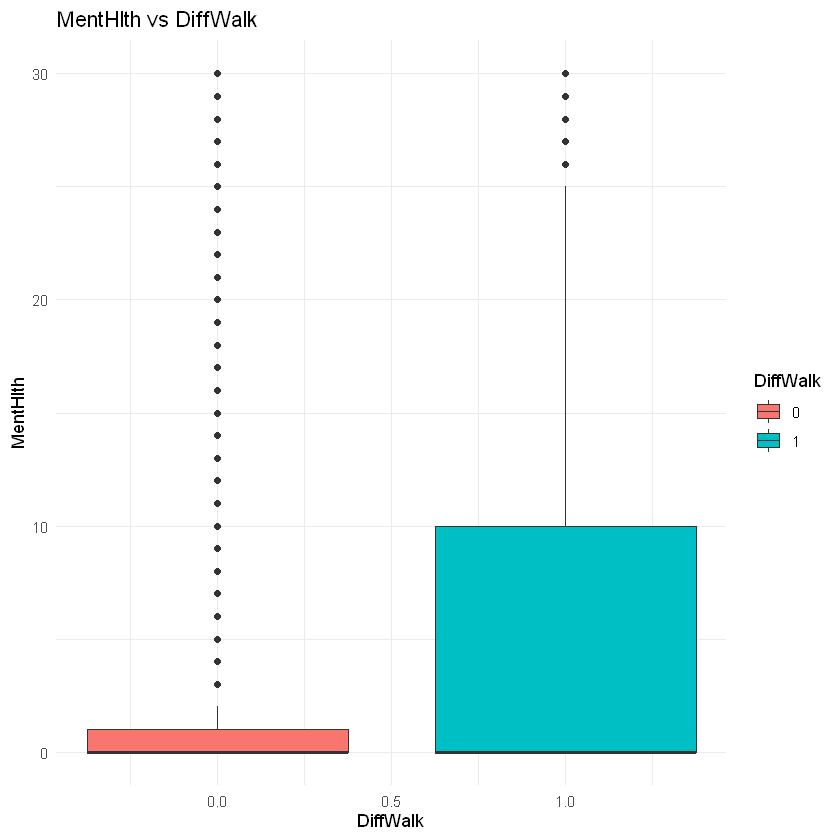

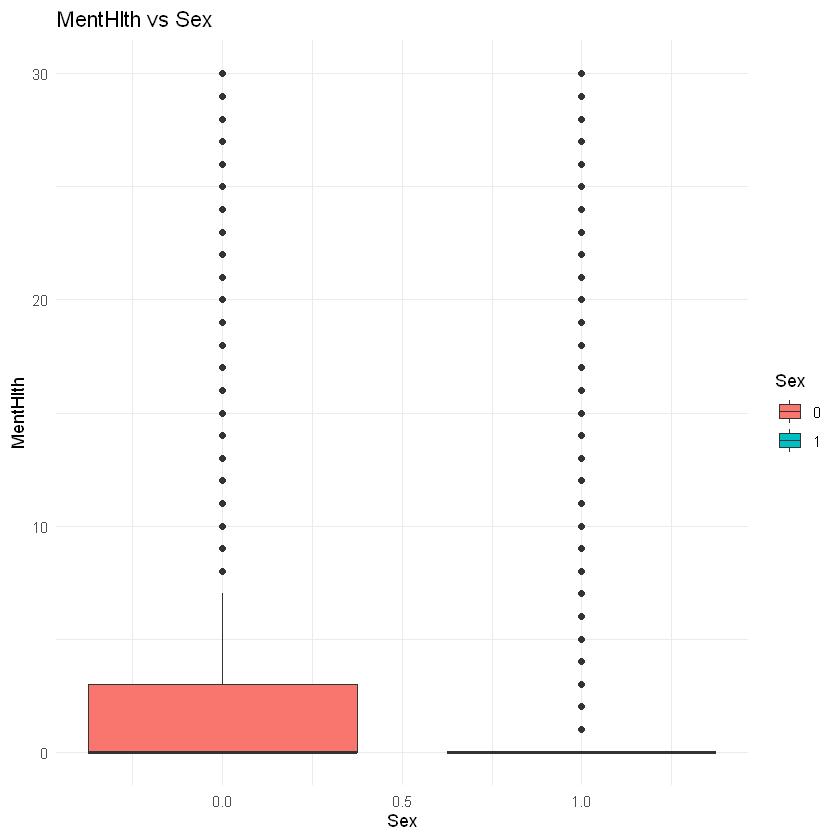

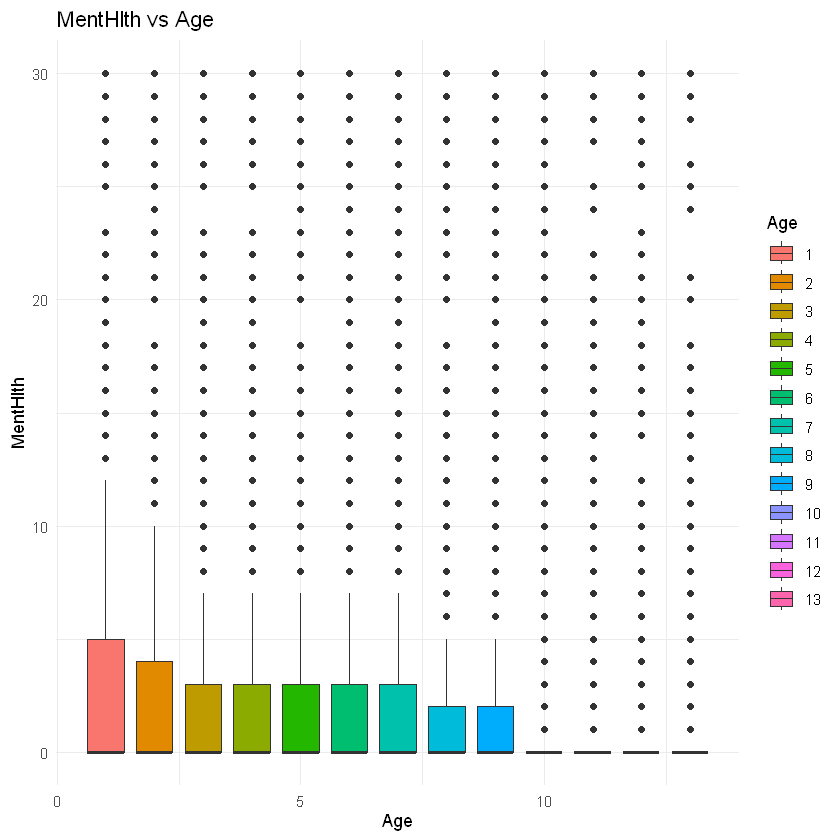

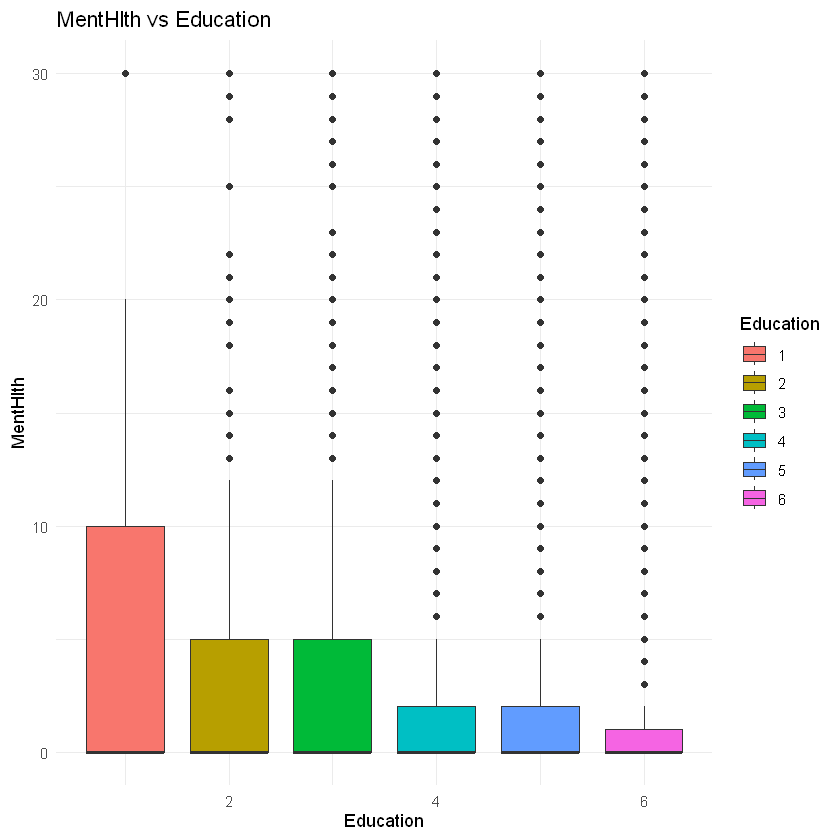

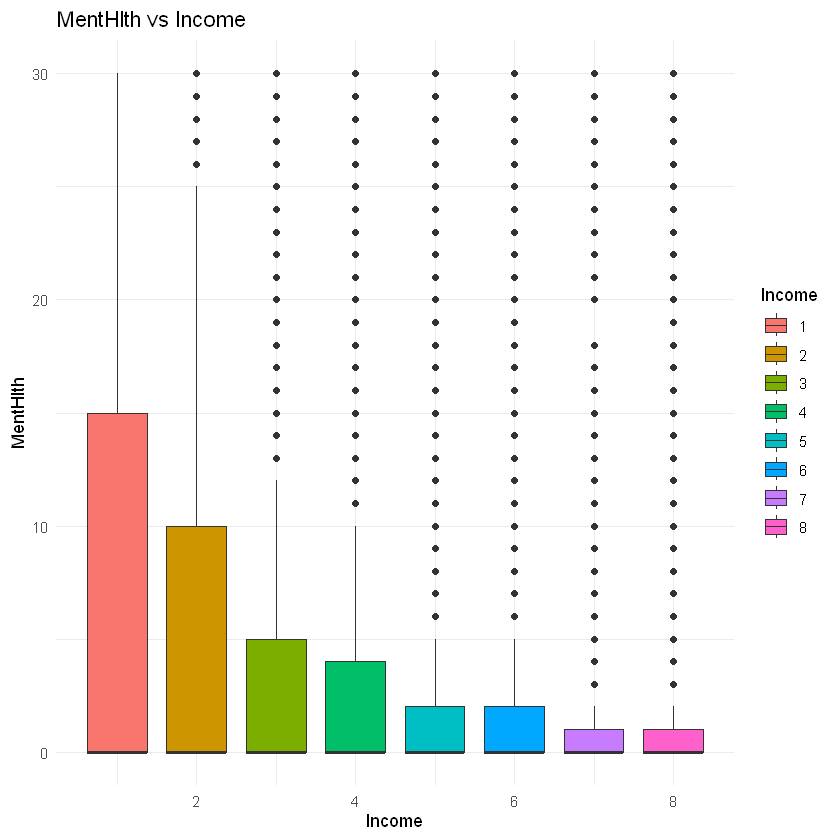

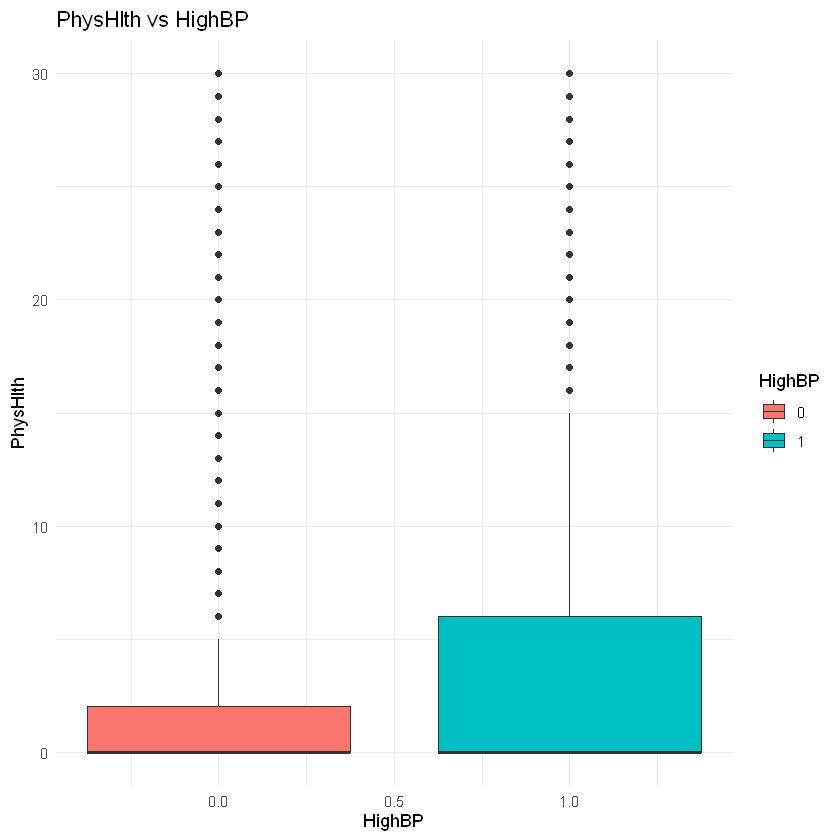

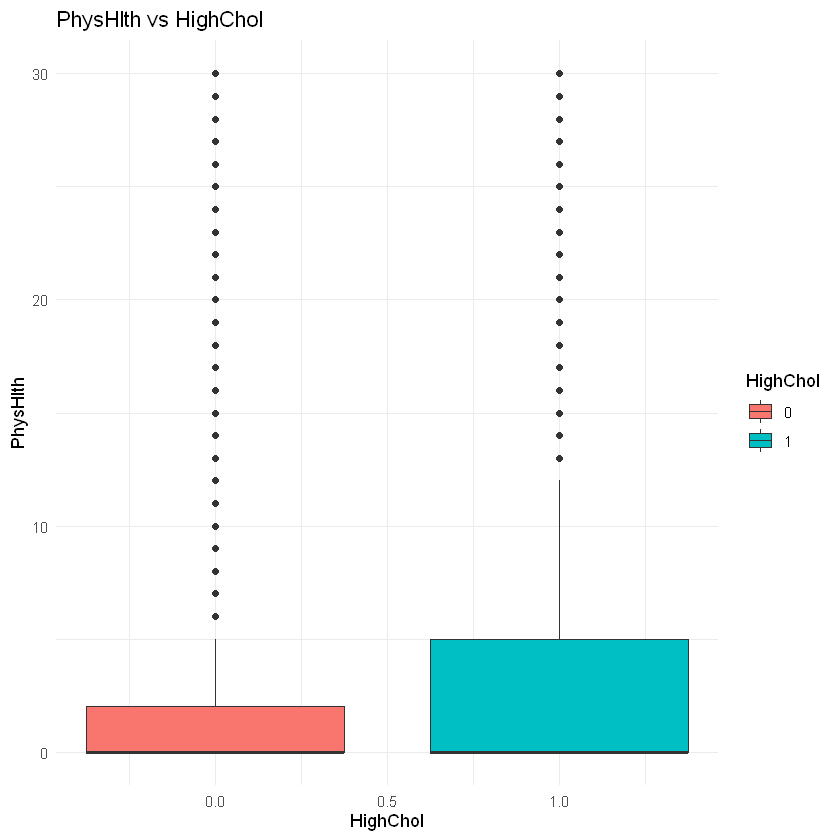

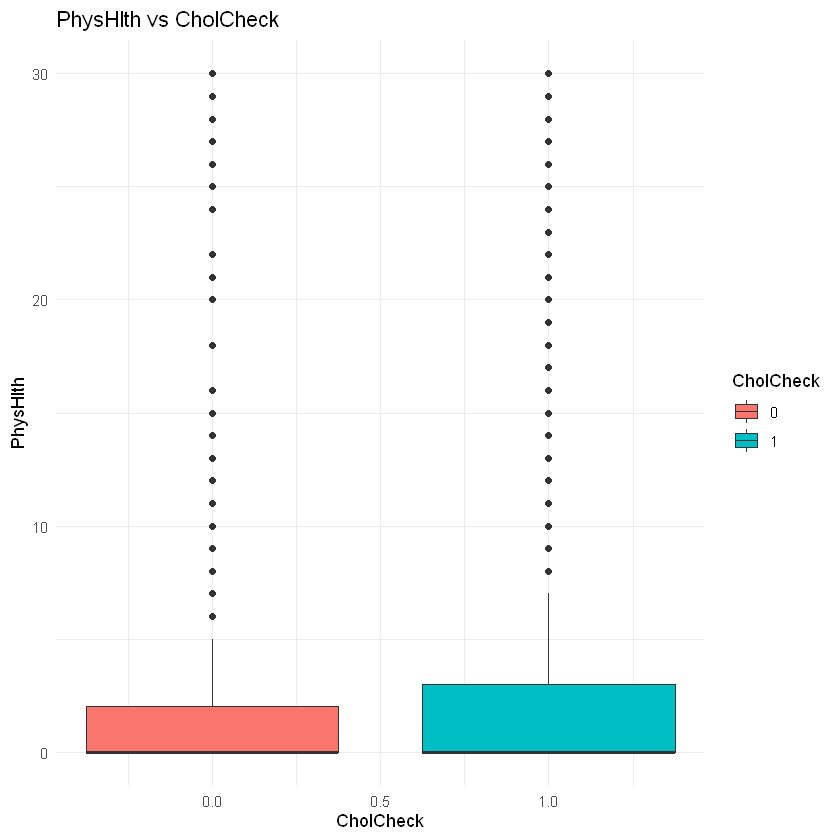

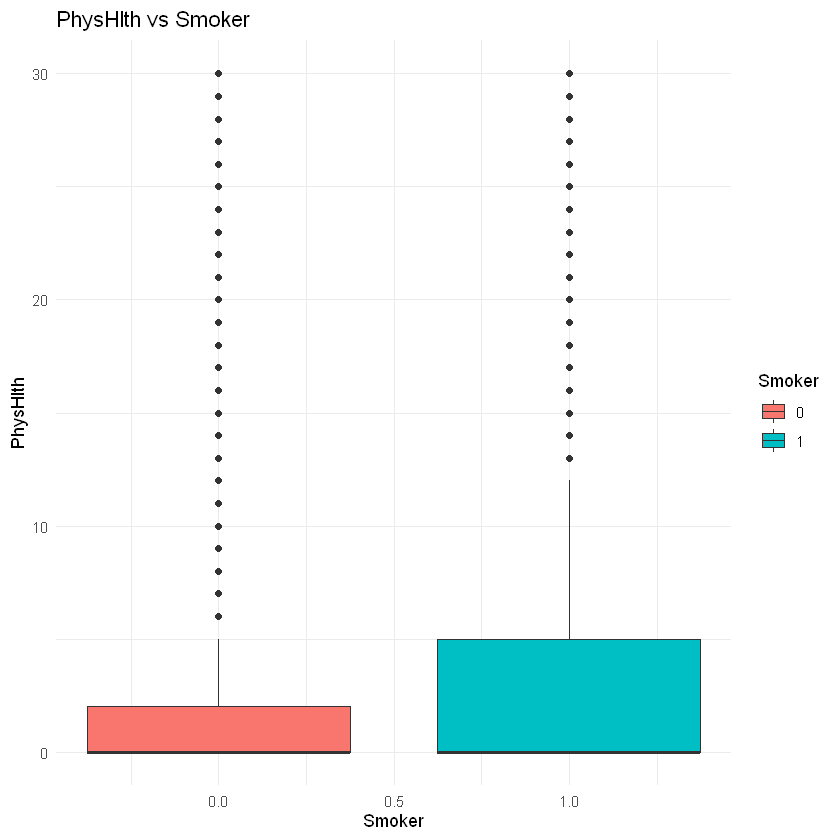

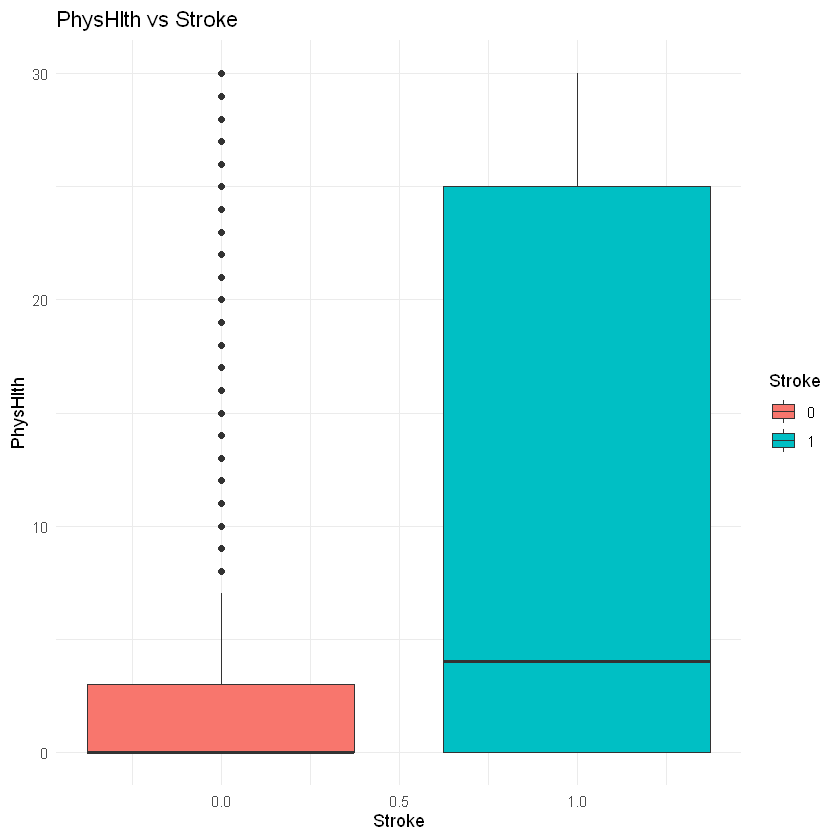

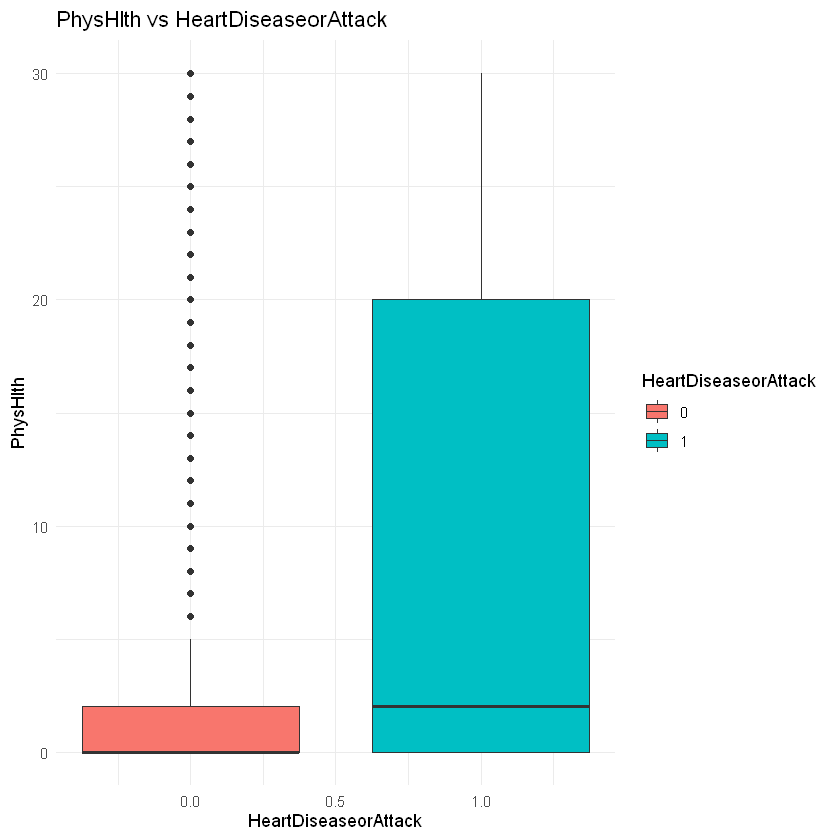

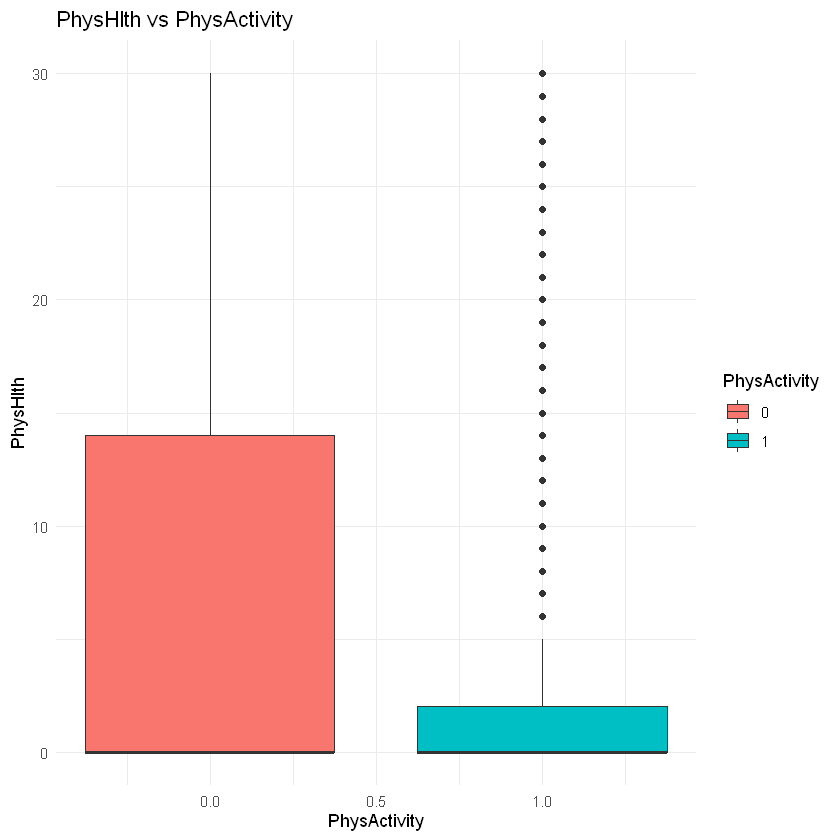

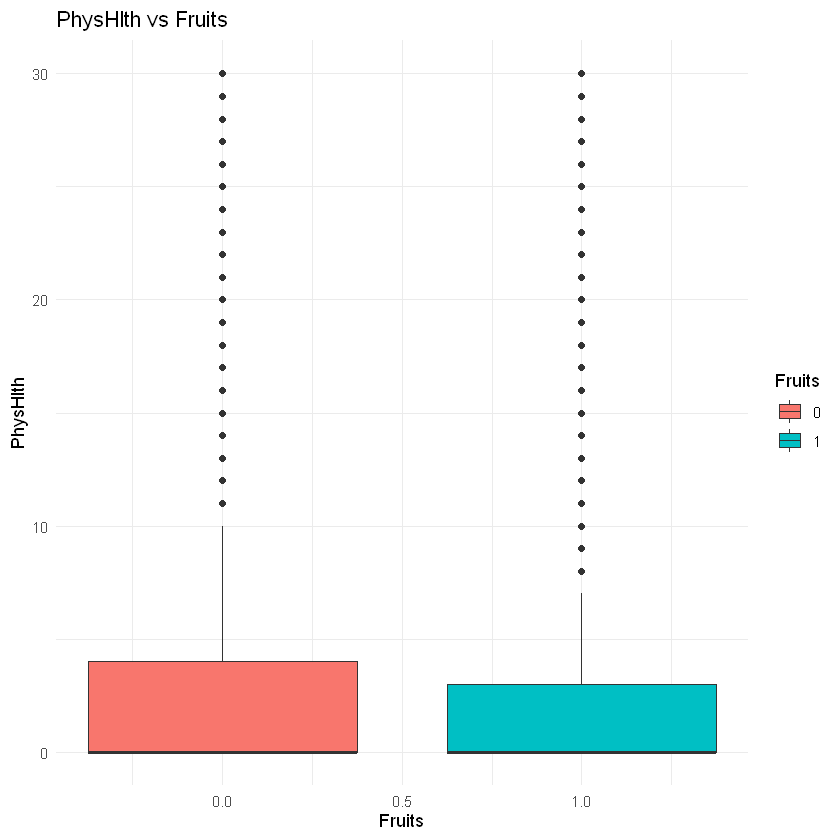

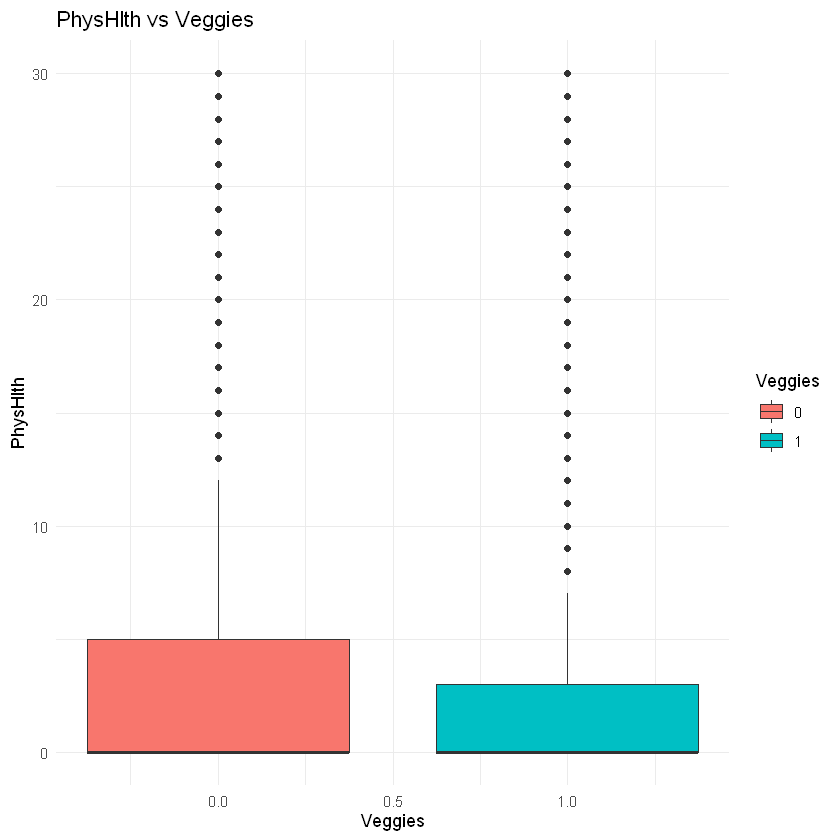

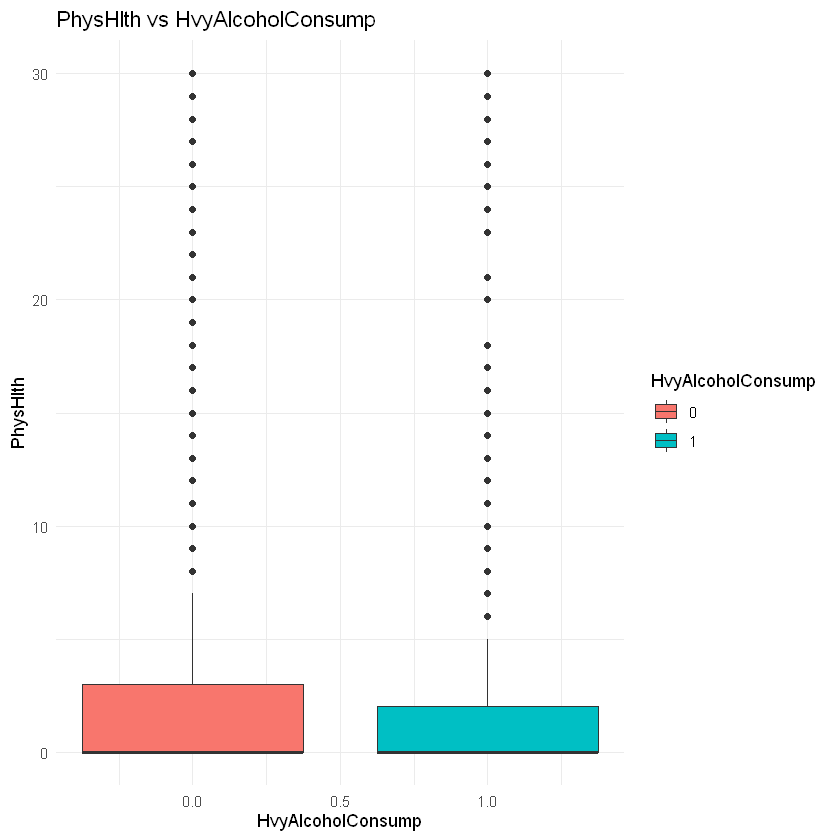

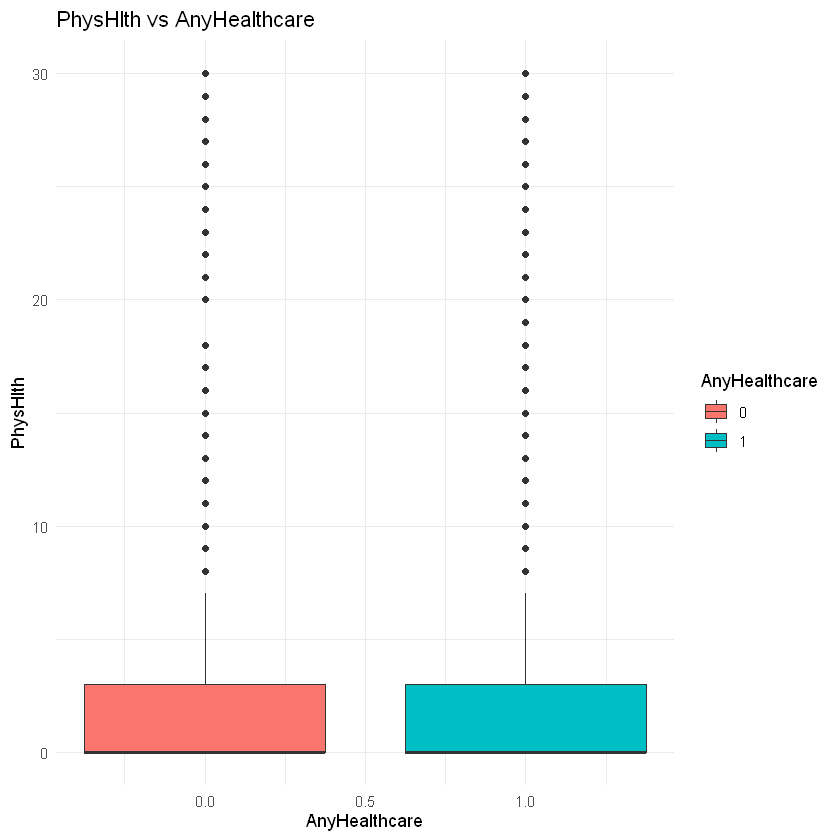

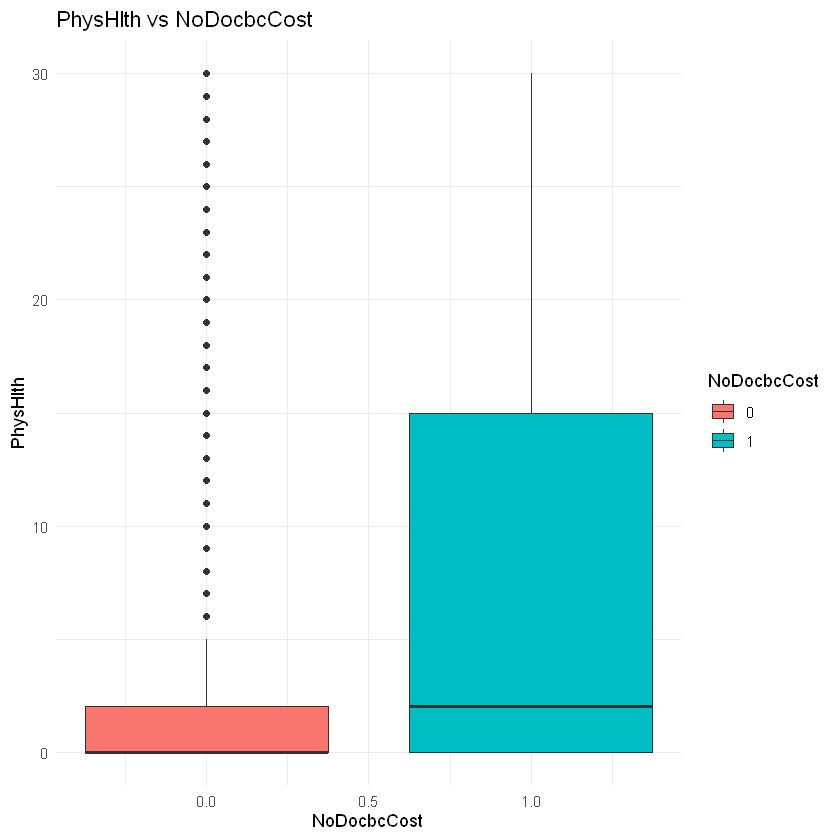

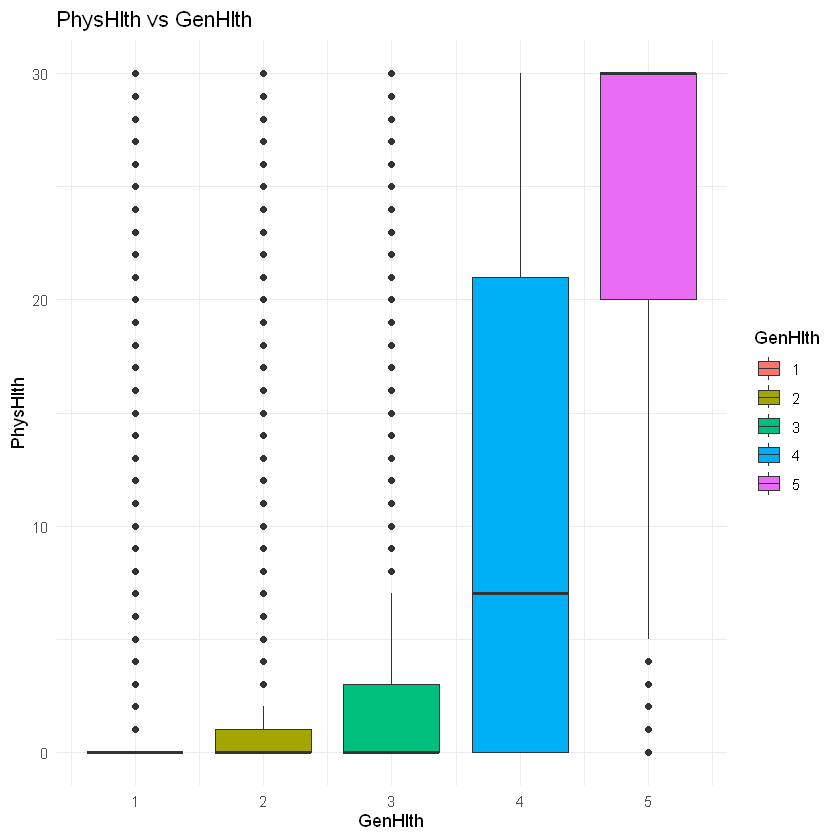

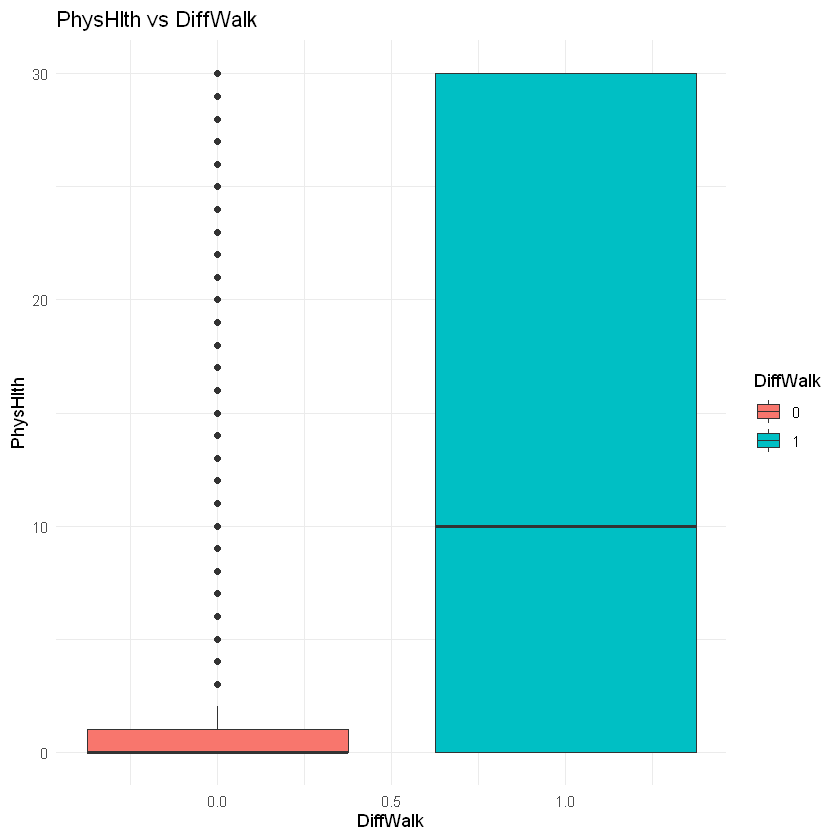

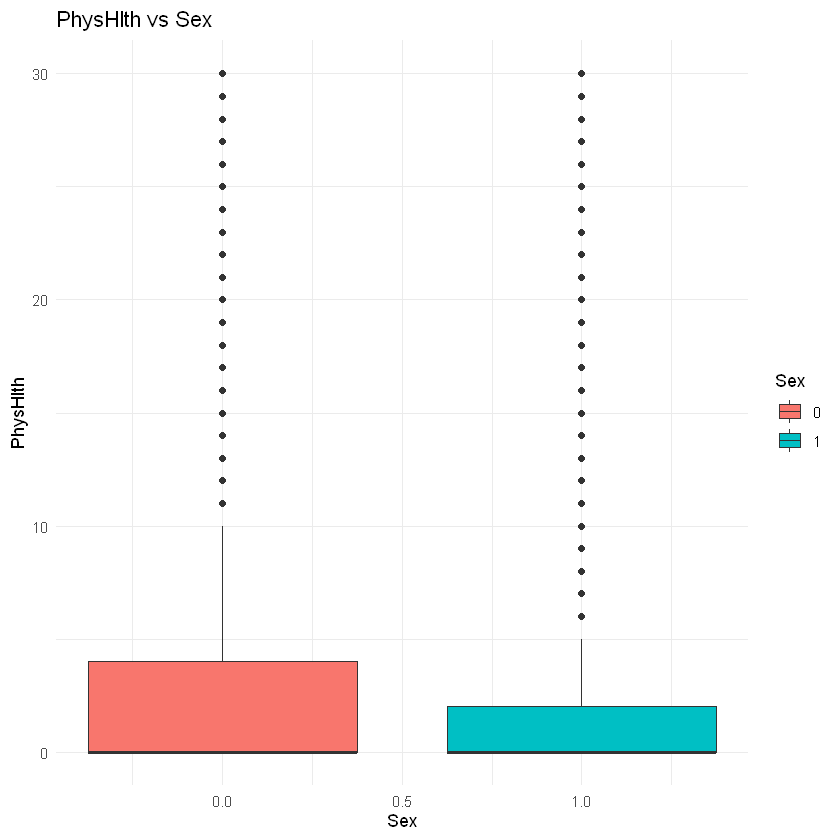

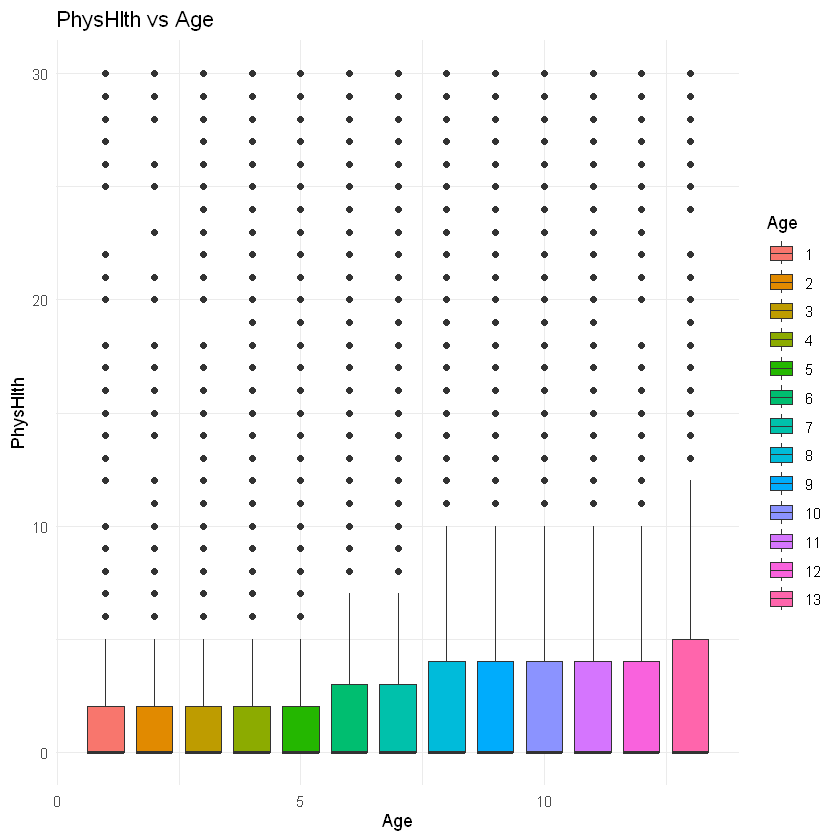

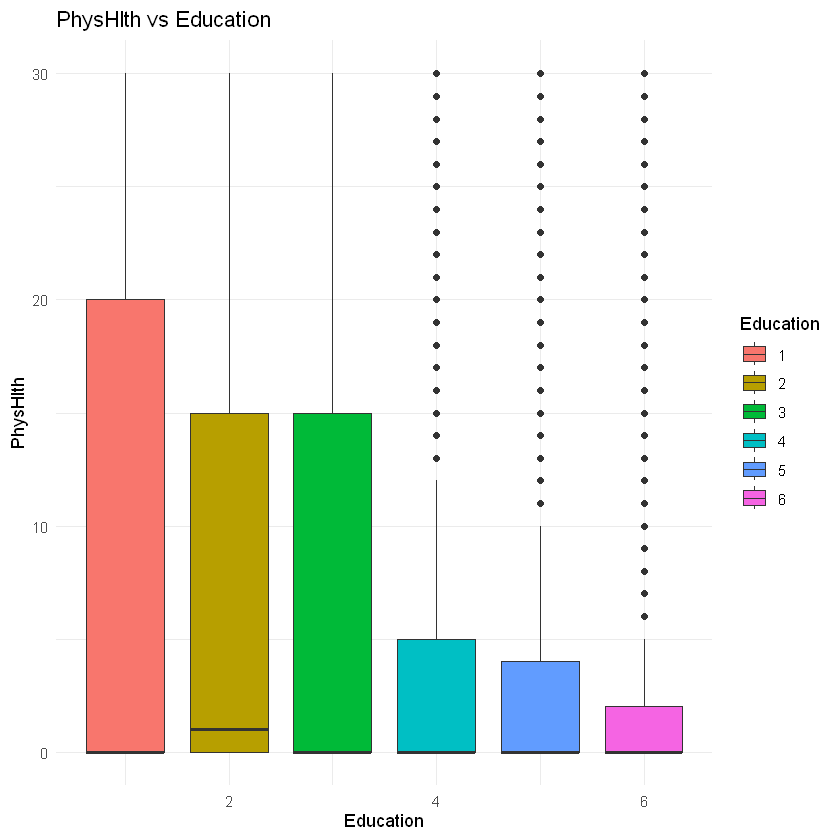

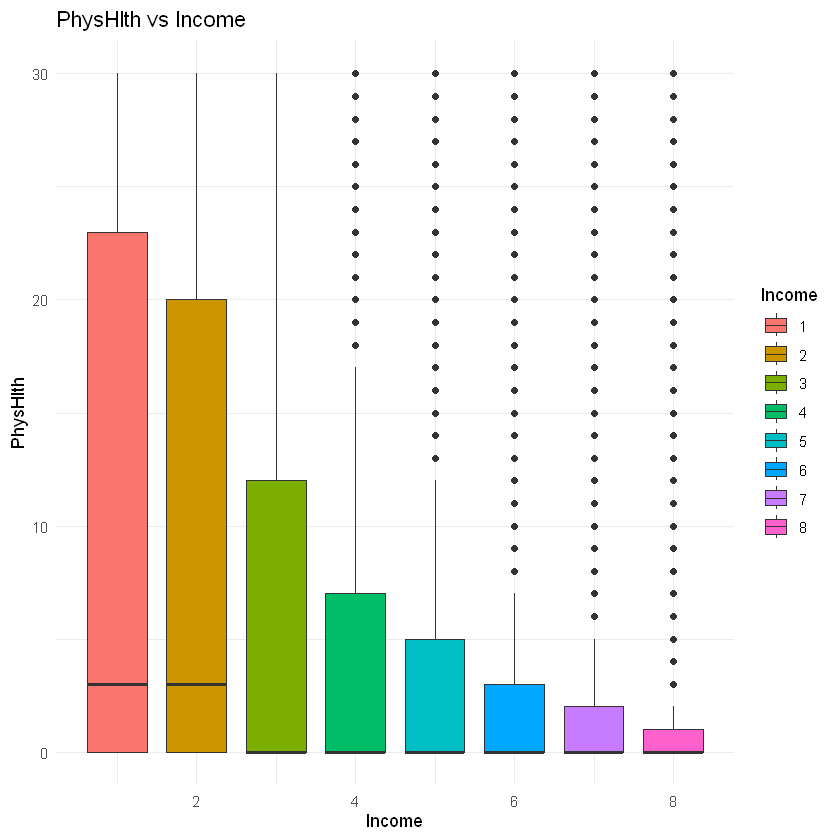

In [5]:
# vẽ boxplot cho quan hệ giữa biến định lượng và biến phân loại
for (i in 1:(ncol(df_quantitative)-1)) {
    for (j in 1:(ncol(df_category))) {
        p <- ggplot(df, aes_string(x = colnames(df_category)[j], y = colnames(df_quantitative)[i], fill = paste0("factor(", colnames(df_category)[j], ")"))) + 
            geom_boxplot() + 
            theme_minimal() + 
            labs(fill = colnames(df_category)[j], title = paste(colnames(df_quantitative)[i], "vs", colnames(df_category)[j]))
        print(p)
    }
}